<a href="https://colab.research.google.com/github/Giusseppe-97/Blackwood_prospects/blob/main/PSEA_MRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # visualization
import seaborn as sns # data visualization with hue
import os 
import time

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* MRAP

In [ ]:
start = time.time()
mrap_ = pd.read_csv('/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/MunRoll - 00 RE - All Properties June.csv',skiprows=3,low_memory=False, sep=',',on_bad_lines='warn')
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

b'Skipping line 32903: expected 64 fields, saw 65\nSkipping line 279163: expected 64 fields, saw 65\nSkipping line 504028: expected 64 fields, saw 65\nSkipping line 579776: expected 64 fields, saw 65\nSkipping line 866992: expected 64 fields, saw 66\n'


Execution time: 0.34 min


In [ ]:
mrap_.head()

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Land Use,Zoning,Owner1,Owner2,Mailing Address,Mailing City,Mailing State,Mailing Zip,Mailing Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,8617 - COUNTY : COMMERCIAL - TOTAL VALUE,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN
3,0101000000028,1250 NW 21 ST,Miami,NaN,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,LINCOLN SANTA CLARA II LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& LINCOLN SANTA CLARA II LLC,OR# 32818-2366,293744.0,0.0,0.0,360.0,17.0,204.0,2005.0,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293744.0,293744.0,NaN
4,0101000000030,60 SE 2 ST,Miami,33131-2103,2021.0,7618560.0,0.0,7618560.0,5587359.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5587359.0,0.0,0.0,0.0,0.0,0.0,101.0,1081 - VACANT LAND - COMMERCIAL : VACANT LAND,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG 12.2FT W OF X OF S/L OF SE 2,ST & W/L OF SE 1 AVE TH S11.85FT,SWLY A/D 72.55FT S52.71FT,W108.69FT N10FT W4.6FT N123.52FT,E137.4FT TO POB,0.0,16384.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,NaN,NaN,NaN,0.0,0.0,NaN


In [ ]:
mrap.drop(columns=['Folio','Unnamed: 64','Unnamed: 65'],inplace=True)

In [ ]:
mrap.rename(columns={'FolioB':'Folio'},inplace=True)

In [ ]:
mrap.shape

(922475, 64)

* HEX

In [ ]:
mrap_['hex_value'] = mrap_['HEX'].fillna(np.nan)
mrap_['hex_ind'] = mrap_.apply(lambda row: 1 if row['hex_value'] == 0.0 else 0, axis=1)
mrap_['absent_owner'] = mrap_['HEX'].fillna(np.nan)
mrap_['absent_owner'] = mrap_.apply(lambda row: 0 if row['hex_value'] == 0.0 else 1, axis=1)

In [ ]:
# Info from mailing address vs property address
mrap_ = mrap_.rename(columns={'Mailing Country': 'Country'})
mrap_ = mrap_.rename(columns={'Mailing State': 'State'})
mrap_ = mrap_.rename(columns={'Mailing City': 'City'})

In [ ]:
# print(mrap_.Country.value_counts()) 
# print(mrap_.State.value_counts())
print(mrap_.City.value_counts().head(50))

MIAMI                 473387
HIALEAH                59811
MIAMI BEACH            36261
HOMESTEAD              35125
CORAL GABLES           26607
AVENTURA               21566
DORAL                  19880
MIAMI GARDENS          12375
NAPLES                 11528
MIAMI LAKES            11452
SUNNY ISLES BEACH       9888
NORTH MIAMI BEACH       9352
NORTH MIAMI             8246
CUTLER BAY              7732
KEY BISCAYNE            7308
OPA LOCKA               6781
PALMETTO BAY            4984
NEW YORK                4659
MIAMI SPRINGS           4292
WEST PALM BEACH         4123
PINECREST               4070
HIALEAH GARDENS         3859
MIAMI SHORES            3840
NO MIAMI BEACH          3667
HOLLYWOOD               3483
Miami                   3377
MIRAMAR                 3338
PEMBROKE PINES          2931
SURFSIDE                2864
FLORIDA CITY            2596
N MIAMI BEACH           2540
BAL HARBOUR             2530
BROOKLYN                2346
WESTON                  2316
NO MIAMI      

In [ ]:
mrap_['Country'].isna().sum()
mrap_['State'].isna().sum()
mrap_['City'].isna().sum()

6432

In [ ]:
# Remmeber missing values for Country column: 351499
# Remmeber missing values for State column: 12560
# Remmeber missing values for City column: 6432

percentage_USA_over_all_records = 563672*100/mrap_.shape[0]
print('percentage_USA_over_all_records')
print(percentage_USA_over_all_records)
mrap_.Country.value_counts()

percentage_FL_over_all_records = 865491*100/mrap_.shape[0]
print('percentage_FL_over_all_records')
print(percentage_FL_over_all_records)

percentage_USA_over_all_records
61.104311769966664
percentage_FL_over_all_records
93.82270522236375


In [ ]:
m_cities=['Aventura','Bal Harbour',
            'Bay Harbor Islands', 'Biscayne Park',
            'Coral Gables', 'Cutler Bay', 'Doral',
            'El Portal',  'Florida City', 'Golden Beach',
            'Hialeah',  'Hialeah Gardens',  'Homestead',
            'Indian Creek', 'Key Biscayne', 'Medley', 'Miami',
            'Miami Beach',  'Miami Gardens',  'Miami Lakes',
            'Miami Shores', 'Miami Springs',  'North Bay Village',
            'North Miami',  'North Miami Beach',  'Opa-locka',
            'Palmetto Bay', 'Pinecrest',  'South Miami',
            'Sunny Isles Beach',  'Surfside', 'Sweetwater',
            'Virginia Gardens', 'West Miami'] 

In [ ]:
mrap_.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Land Use,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,8617 - COUNTY : COMMERCIAL - TOTAL VALUE,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0


In [ ]:
mrap_['mail_vs_country'] = mrap_.apply(lambda row: 0 if row['Country'] == 'USA' else 0 if  row['Country']== '' else 1, axis=1)
mrap_['mail_vs_state'] = mrap_.apply(lambda row: 0 if row['State'] == 'FL'else 0 if  row['State']== '' else 1, axis=1)

* Owner 1 data set

In [ ]:
est_ind=mrap_[['Folio', 'Owner1']]
est_ind

,Folio,Owner1
0,0101000000020,16 SE 2ND STREET DOWNTOWN
1,0101000000022,MIAMI-DADE COUNTY
2,0101000000026,SANTA CLARA APARTMENTS I LLC
3,0101000000028,LINCOLN SANTA CLARA II LLC
4,0101000000030,16 SE 2ND STREET DOWNTOWN
...,...,...
922470,3660170162210,RANDALL UJUETA JTRS
922471,3660170162220,CATALINA WEST HOMEOWNERS
922472,3660170170010,TESHICA ANTOINETTE BECKFORD TRS
922473,3660170170020,HORACE CALHOUN


In [ ]:
est_of=est_ind[est_ind['Owner1'].str.contains('EST OF.*')==True] 
est_of
# found: 5297

,Folio,Owner1
1000,0102020001140,RAFAEL GUERRERO EST OF
2221,0131120160220,AURORA SERRANO EST OF
2224,0131120160250,MARIE L JEAN LOUIS EST OF
2228,0131120160290,DAISY PEARL JAMES EST OF
2441,0131120320441,CONLEY JOHNSON EST OF
...,...,...
919293,3660160060090,EST OF CARMEN T ALONSO
919416,3660160090240,FRANCISCO RAMOS EST OF
919540,3660160100240,ERIC BOLLING EST OF
920424,3660160160190,JUAN ANTONIO ARIAS EST OF


In [ ]:
estate_of=est_ind[est_ind['Owner1'].str.contains('ESTATE OF.*')==True] 
estate_of
# found: 39

,Folio,Owner1
2039,0131120130210,ESTATE OF PIERRE AMBROISE
14071,0131240200910,LUDES NICOLE ESTATE OF
18603,0131260130350,JMDH REAL ESTATE OF MIAMI LLC
18604,0131260130360,JMDH REAL ESTATE OF MIAMI LLC
18609,0131260130470,JMDH REAL ESTATE OF MIAMI LLC
18610,0131260130480,JMDH REAL ESTATE OF MIAMI LLC
33468,0131350250110,REAL ESTATE OF SOUTH FL LLC
64804,0141030330541,ESTATE OF DANIEL S JASINSKI
67862,0141040233940,EVELIO DIAZ ESTATE OF
67891,0141040234220,ARACELIS FORTUNATO ESTATE OF


In [ ]:
estate_of.shape

(39, 2)

In [ ]:
est = est_of.append(estate_of)
est

,Folio,Owner1
1000,0102020001140,RAFAEL GUERRERO EST OF
2221,0131120160220,AURORA SERRANO EST OF
2224,0131120160250,MARIE L JEAN LOUIS EST OF
2228,0131120160290,DAISY PEARL JAMES EST OF
2441,0131120320441,CONLEY JOHNSON EST OF
...,...,...
816564,3122110212180,NELLY ROVIRA ESTATE OF
846566,3350330270090,ESTATE OF EILEEN KEENE
848904,3411320030770,ESTATE OF SADIE L HORNE
857219,3411360170130,ESTATE OF ARTHUR TAURIAC


* Owner 2 data set

In [ ]:
t_est_ind=mrap_[['Folio', 'Owner2']]


In [ ]:
t_est_of=t_est_ind[t_est_ind['Owner2'].str.contains('EST OF.*')==True]
print(t_est_of.shape) 
t_estate_of=t_est_ind[t_est_ind['Owner2'].str.contains('ESTATE OF.*')==True] 
print(t_estate_of.shape) 
t_est = t_est_of.append(t_estate_of)
t_est
print(t_est.shape) 

(714, 2)
(28, 2)
(742, 2)


In [ ]:
5297 + 714 + 39 + 28

6078

Full Owner Name

In [ ]:
# OBTAINING ESTATE OF INFO FOR OWNER 1
mrap_['est_of_ind_o1'] = mrap_.apply(lambda row: True if 'EST OF' in str(row['Owner1']) or 'ESTATE OF' in str(row['Owner1']) else False, axis=1)
mrap_['est_of_ind_o1'].value_counts()

False    917139
True       5336
Name: est_of_ind_o1, dtype: int64

In [ ]:
# OBTAINING ESTATE OF INFO FOR OWNER 2
mrap_['est_of_ind_o2'] = mrap_.apply(lambda row: True if 'EST OF' in str(row['Owner2']) or 'ESTATE OF' in str(row['Owner2']) else False, axis=1)
mrap_['est_of_ind_o2'].value_counts()

False    921733
True        742
Name: est_of_ind_o2, dtype: int64

In [ ]:
# OBTAINING ESTATE OF INFO FOR OWNER 1
mrap_['b_est_of_ind_o1'] = mrap_.apply(lambda row: True if 'EST OF' in str(row['Owner1']) or 'ESTATE OF' in str(row['Owner1']) or 'EST' == str(row['Owner1'])[-3:] or ' EST ' in str(row['Owner1']) else False, axis=1)
print(mrap_['b_est_of_ind_o1'].value_counts())
# OBTAINING ESTATE OF INFO FOR OWNER 2
mrap_['b_est_of_ind_o2'] = mrap_.apply(lambda row: True if 'EST OF' in str(row['Owner2']) or 'ESTATE OF' in str(row['Owner2']) or 'EST' == str(row['Owner2'])[-3:] or ' EST ' in str(row['Owner2']) else False, axis=1)
print(mrap_['b_est_of_ind_o2'].value_counts())

False    916525
True       5950
Name: b_est_of_ind_o1, dtype: int64
False    921609
True        866
Name: b_est_of_ind_o2, dtype: int64


In [ ]:
mrap_['est_of_both_o'] = mrap_.apply(lambda row: True if (row['b_est_of_ind_o1'] == True and row['b_est_of_ind_o2'] == True) else False, axis=1)
mrap_['est_of_both_o'].value_counts()

False    922371
True        104
Name: est_of_both_o, dtype: int64

In [ ]:

# # OBTAINING ESTATE OF INFO FOR OWNER 2
# mrap['est_of_ind_o2'] = mrap.apply(lambda row: True if (row['Owner2'].str.contains('EST OF.*') == True or row['Owner2'].str.contains('ESTATE OF.*')) else False, axis=1)

mrap_['est_of_ind'] = mrap_.apply(lambda row: 1 if (row['b_est_of_ind_o1'] == True or row['b_est_of_ind_o2'] == True) else 0, axis=1)
print(mrap_['est_of_ind'])
mrap_['est_of_ind'].value_counts()

0         0
1         0
2         0
3         0
4         0
         ..
922470    0
922471    0
922472    0
922473    0
922474    0
Name: est_of_ind, Length: 922475, dtype: int64


0    915763
1      6712
Name: est_of_ind, dtype: int64

In [ ]:
est_of_both_o = mrap_['est_of_both_o'].fillna(False)

In [ ]:
mrap_.head()

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Land Use,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,est_of_ind_o1,est_of_ind_o2,b_est_of_ind_o1,b_est_of_ind_o2,est_of_both_o,est_of_ind
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,False,False,False,False,False,0
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,8617 - COUNTY : COMMERCIAL - TOTAL VALUE,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,False,False,False,False,False,0
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,False,False,False,False,False,0
3,0101000000028,1250 NW 21 ST,Miami,NaN,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,LINCOLN SANTA CLARA II LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& LINCOLN SANTA CLARA II LLC,OR# 32818-2366,293744.0,0.0,0.0,360.0,17.0,204.0,2005.0,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293744.0,293744.0,NaN,0.0,1,0,0,1,False,False,False,False,False,0
4,0101000000030,60 SE 2 ST,Miami,33131-2103,2021.0,7618560.0,0.0,7618560.0,5587359.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5587359.0,0.0,0.0,0.0,0.0,0.0,101.0,1081 - VACANT LAND - COMMERCIAL : VACANT LAND,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG 12.2FT W OF X OF S/L OF SE 2,ST & W/L OF SE 1 AVE TH S11.85FT,SWLY A/D 72.55FT S52.71FT,W108.69FT N10FT W4.6FT N123.52FT,E137.4FT TO POB,0.0,16384.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,0,0,False,False,False,False,False,0


In [ ]:
mrap_['Owner1'] = mrap_.apply(lambda row:row['Owner1'].strip('EST OF.*') if 'EST OF' in str(row['Owner1']) else row['Owner1'], axis = 1)
mrap_['Owner2'] = mrap_.apply(lambda row:row['Owner2'].strip('EST OF.*') if 'EST OF' in str(row['Owner2']) else row['Owner2'], axis = 1)
mrap_['Owner1'] = mrap_.apply(lambda row:row['Owner1'].strip('EST .*') if ' EST ' in str(row['Owner1']) else row['Owner1'], axis = 1)
mrap_['Owner2'] = mrap_.apply(lambda row:row['Owner2'].strip('EST .*') if ' EST ' in str(row['Owner2']) else row['Owner2'], axis = 1)
mrap_['Owner1'] = mrap_.apply(lambda row:row['Owner1'].strip('ESTATE OF.*') if 'ESTATE OF' in str(row['Owner1']) else row['Owner1'], axis = 1)
mrap_['Owner2'] = mrap_.apply(lambda row:row['Owner2'].strip('ESTATE OF.*') if 'ESTATE OF' in str(row['Owner2']) else row['Owner2'], axis = 1)

In [ ]:

mrap_['owner_1'] = mrap_['Owner1'].fillna("")
mrap_['owner_2'] = mrap_['Owner2'].fillna("")
mrap_['owner_1'] = mrap_['owner_1'].astype(str)
mrap_['owner_2'] = mrap_['owner_2'].astype(str)
mrap_['full_owner_name'] = mrap_[['owner_1', 'owner_2']].agg(' '.join, axis=1)

In [ ]:
mrap_.drop(columns=['est_of_ind_o1',	'est_of_ind_o2',	'b_est_of_ind_o1',	'b_est_of_ind_o2',	'est_of_both_o'], inplace=True)

In [ ]:
mrap_.head()

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Land Use,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,est_of_ind,owner_1,owner_2,full_owner_name
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,8617 - COUNTY : COMMERCIAL - TOTAL VALUE,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,0,SANTA CLARA APARTMENTS I LLC,,SANTA CLARA APARTMENTS I LLC
3,0101000000028,1250 NW 21 ST,Miami,NaN,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,LINCOLN SANTA CLARA II LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& LINCOLN SANTA CLARA II LLC,OR# 32818-2366,293744.0,0.0,0.0,360.0,17.0,204.0,2005.0,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293744.0,293744.0,NaN,0.0,1,0,0,1,0,LINCOLN SANTA CLARA II LLC,,LINCOLN SANTA CLARA II LLC
4,0101000000030,60 SE 2 ST,Miami,33131-2103,2021.0,7618560.0,0.0,7618560.0,5587359.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5587359.0,0.0,0.0,0.0,0.0,0.0,101.0,1081 - VACANT LAND - COMMERCIAL : VACANT LAND,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG 12.2FT W OF X OF S/L OF SE 2,ST & W/L OF SE 1 AVE TH S11.85FT,SWLY A/D 72.55FT S52.71FT,W108.69FT N10FT W4.6FT N123.52FT,E137.4FT TO POB,0.0,16384.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,3262063

In [ ]:
# mrap_['LifeState'] = (mrap['full_owner_name'].str.contains("REM.*") == True) | (mrap['full_owner_name'].str.contains("LE.*") == True) 
# mrap['LifeState2'] = (mrap['full_owner_name'].str.contains("\sREM\s") == True) | (mrap['full_owner_name'].str.contains("\sLE\s") == True) 
# mrap['LifeState2'] = mrap['LifeState2'].map({True: 1, False: 0})
# mrap['LifeEstate'] = mrap['LifeEstate'].map({True: 1, False: 0})
# mrap = mrap.rename(columns={"LifeState": "LifeEstate",
#                         "LifeState2": "LifeEstate2"})
mrap_['LifeState'] = (mrap_['full_owner_name'].str.contains("LE REM.*") == True) | (mrap_['full_owner_name'].str.contains(" LE ") == True) 
mrap_['life_estate'] = mrap_['LifeState'].map({True: 1, False: 0})
le=mrap_[['Folio','full_owner_name','life_estate',]]
le_of=le[le['full_owner_name'].str.contains('LE REM')==True] 
le_of_2=le[le['full_owner_name'].str.contains('LE REM.*')==True] 
print(le_of)
le_of_2

                Folio                                    full_owner_name  life_estate
728     0102000101090        GLORIA FENTANES GYORI LE REM TERESITA GYORI            1
994     0102020001080               MARTIN J CRUZ LE REM JORGE RODRIGUEZ            1
1025    0102020101210             EUNICE CORDERO LE REM MARTIN J CORDERO            1
1029    0102020201020                   DAMARIS LUNA LE REM JUAN A REYES            1
1052    0102020501060           ROBERTO JIMENEZ LE REM OLGA L CRUZ NOSTI            1
...               ...                                                ...          ...
921276  3660160221480               FARIDEH PHILSOOPH LE REM JEFF ANSARI            1
921651  3660160250780  MARIA T TABING PRESINCULA LE REM RICHARD STEVE...            1
921716  3660160260540           MEHRNOOSH KORDY LE REM GOLNOOSH GOLTAPEH            1
921854  3660170070280  KIMBERLY SHARE KAPLAN LE REM DANIELLE NICOLE LOWE            1
921944  3660170080750       ROBERTO GUERRA LE REM MARI

,Folio,full_owner_name,life_estate
728,0102000101090,GLORIA FENTANES GYORI LE REM TERESITA GYORI,1
994,0102020001080,MARTIN J CRUZ LE REM JORGE RODRIGUEZ,1
1025,0102020101210,EUNICE CORDERO LE REM MARTIN J CORDERO,1
1029,0102020201020,DAMARIS LUNA LE REM JUAN A REYES,1
1052,0102020501060,ROBERTO JIMENEZ LE REM OLGA L CRUZ NOSTI,1
...,...,...,...
921276,3660160221480,FARIDEH PHILSOOPH LE REM JEFF ANSARI,1
921651,3660160250780,MARIA T TABING PRESINCULA LE REM RICHARD STEVE...,1
921716,3660160260540,MEHRNOOSH KORDY LE REM GOLNOOSH GOLTAPEH,1
921854,3660170070280,KIMBERLY SHARE KAPLAN LE REM DANIELLE NICOLE LOWE,1


In [ ]:
mrap_.drop(columns=['LifeState','LifeState2'], inplace=True)

In [ ]:
mrap_.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Land Use,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,est_of_ind,owner_1,owner_2,full_owner_name,life_estate,estate_of
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,8617 - COUNTY : COMMERCIAL - TOTAL VALUE,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,0,SANTA CLARA APARTMENTS I LLC,,SANTA CLARA APARTMENTS I LLC,0,0


In [ ]:
mrap_.to_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_1.csv", header=True, index=False, sep='|')

In [ ]:
mrap = pd.read_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_1.csv", on_bad_lines='warn', low_memory=False, sep='|')

In [ ]:
mrap.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Land Use,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,8617 - COUNTY : COMMERCIAL - TOTAL VALUE,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,NaN,SANTA CLARA APARTMENTS I LLC,0,0


* Land Use Data Set

In [ ]:
landuse=mrap[['Folio','Land Use']]

In [ ]:
landuse.head()

,Folio,Land Use
0,0101000000020,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT
1,0101000000022,8617 - COUNTY : COMMERCIAL - TOTAL VALUE
2,0101000000026,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...
3,0101000000028,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...
4,0101000000030,1081 - VACANT LAND - COMMERCIAL : VACANT LAND


In [ ]:
by_folio=landuse.groupby('Folio')['Land Use'].sum().rename_axis('Folio').reset_index(name='Land Use')

In [ ]:
by_folio.head()

,Folio,Land Use
0,0101000000020,2865 - PARKING LOT/MOBILE HOME PARK : PARKING LOT
1,0101000000022,8617 - COUNTY : COMMERCIAL - TOTAL VALUE
2,0101000000026,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...
3,0101000000028,9017 - LEASEHOLD INTEREST : COMMERCIAL - TOTAL...
4,0101000000030,1081 - VACANT LAND - COMMERCIAL : VACANT LAND


In [ ]:
by_folio=by_folio.copy()
by_folio['split']=by_folio['Land Use'].str.split()
by_folio=by_folio.copy()
mrap['land_use_code']=by_folio.split.str.get(0)
mrap.drop(columns=['Land Use'],inplace=True)

In [ ]:
by_folio.Folio.nunique()

922475

Zoning

In [ ]:
split_zo = mrap['Zoning'].str.split('-')
zone_codes = split_zo.str.get(0)
zone_names = split_zo.str.get(1) + " " + split_zo.str.get(2)
mrap['zoning_names'] = zone_names.to_frame()
mrap['zoning_names'] = mrap['zoning_names'].fillna(0)
mrap['zoning_codes'] = zone_codes.to_frame()
mrap['zoning_codes'] = mrap['zoning_codes'].fillna(0)
mrap['zoning_codes']

0         6401 
1         6100 
2         6100 
3         6100 
4         6401 
          ...  
922470    0100 
922471    3700 
922472    0100 
922473    0100 
922474        0
Name: zoning_codes, Length: 922475, dtype: object

* Zip codes

In [ ]:
zipcodes.shape

(922475, 2)

In [ ]:
split = mrap[' Property Zip'].str.split('-')
zips = split.str.get(0)
mrap['zip_codes'] = zips.fillna(0)

* Fixing zip codes

In [ ]:
start = time.time()
trans = pd.read_csv(os.path.join(os.getcwd(),'transformed_data.csv'))
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.0 min


In [ ]:
trans.shape

(146186, 12)

In [ ]:
duplicates=zipcodes.duplicated()
duplicates.value_counts()

False    919184
dtype: int64

In [ ]:
#zipcodes.drop_duplicates(inplace=True)
#zipcodes.shape

(877499, 2)

In [ ]:
trans.Folio=trans.Folio.astype(str)
trans.Folio=trans.Folio.apply(lambda x: '0'+x if len(x)==12 else x)

In [ ]:
merge=trans.merge(zipcodes, how='left', on='Folio')

In [ ]:
merge.rename(columns={' Property Zip':'Zip'},inplace=True)

In [ ]:
merge=merge.copy()
merge['split']=merge['Zip'].str.split('-')

In [ ]:
merge=merge.copy()
merge['Zip_Code']=merge.split.str.get(0)

In [ ]:
merge.Zip_Code.isna().sum()

959

In [ ]:
merge.drop(columns=['Zip', 'split'],inplace=True)

In [ ]:
merge.head(3)

,Folio,SaleID,DateSale,Price,QU_FLG,SalesCode,DifDates,GrossMargin,SalesCode2,PurchasePrice,PurchaseDate,Days,Zip_Code
0,0101000000260,6.0,2017-06-30,37250000.0,Q,2.0,1086 days 00:00:00,18250000.0,1.0,19000000.0,2014-07-10 00:00:00,1086,33130
1,0101000000555,2.0,2018-04-05,5250000.0,U,18.0,64 days 00:00:00,-1750000.0,18.0,7000000.0,2018-01-31 00:00:00,64,33136
2,0101010401030,5.0,2016-03-03,700000.0,Q,1.0,385 days 00:00:00,165000.0,1.0,535000.0,2015-02-12 00:00:00,385,33136


In [ ]:
merge.to_csv('transformed_with_zipcodes_fixed.csv', index=False)

In [ ]:
mrap_.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,zoning_names,zoning_codes,zip_codes,land_use_code
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,0,6401,33131,2865
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,COMMERCIAL NEIGHBORHOOD,6100,33132,8617
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,,SANTA CLARA APARTMENTS I LLC,0,0,COMMERCIAL NEIGHBORHOOD,6100,33142,9017


In [ ]:
merge1=merge.merge(by_folio, how='left', on='Folio')

In [ ]:
merge1.to_csv('transformed_with_zipcodes_fixed_and_land_use.csv', index=False)

Year Built

In [ ]:
# YearBuilt
with pd.option_context('mode.use_inf_as_null', True):year_built = mrap[['Folio', 'YearBuilt']].dropna()
mrap_year_built_treatment = year_built.groupby('Folio')['YearBuilt'].sum().rename_axis('Folio').reset_index(name='YearBuilt')
mrap['year_built'] = mrap_year_built_treatment['YearBuilt']

In [ ]:
mrap.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,8617.0,COMMERCIAL NEIGHBORHOOD,6100,33132,0.0
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,NaN,SANTA CLARA APARTMENTS I LLC,0,0,9017.0,COMMERCIAL NEIGHBORHOOD,6100,33142,2003.0


In [ ]:
mrap.to_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_2.csv", header=True, index=False, sep='|')

In [ ]:
mrap = pd.read_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_2.csv", on_bad_lines='warn', low_memory=False, sep='|')

SALE LOGIC

In [ ]:
mrap['sale_type_1'] = mrap['Sale Type 1'].fillna(np.nan).astype(str)
mrap['sale_type_2'] = mrap['Sale Type 2'].fillna(np.nan).astype(str)
mrap['sale_type_3'] = mrap['Sale Type 3'].fillna(np.nan).astype(str)

In [ ]:
mrap['sale_type_1'].value_counts()

1.0     376377
0.0     199499
11.0    176618
nan      37559
12.0     24846
5.0      18810
14.0     14515
2.0      13732
3.0      12791
37.0     11704
30.0     11057
18.0      6431
19.0      5907
98.0      4818
43.0      2183
38.0      1653
17.0      1342
40.0      1092
16.0       686
32.0       289
39.0       264
35.0       106
31.0        90
13.0        38
20.0        16
36.0        13
34.0        13
42.0        12
33.0         7
21.0         3
15.0         2
6.0          2
Name: sale_type_1, dtype: int64

Sales Codes

In [ ]:
qual_code = {
  'nan':-1,
 'NaN': -1,
 np.nan: -1,
 '0.0':  1,
 '1.0':  1,
 '2.0':  1,
 '3.0':  1,
 '4.0':  1,
 '5.0':  1,
 '6.0':  1,
 '11.0': 0,
 '12.0': 0,
 '13.0': 1,
 '14.0': 0,
 '15.0': 0,
 '16.0': 0,
 '17.0': 0,
 '18.0': 1,
 '19.0': 1,
 '20.0': 0,
 '21.0': 0,
 '30.0': 0,
 '31.0': 0,
 '32.0': 0,
 '33.0': 0,
 '34.0': 0,
 '35.0': 0,
 '36.0': 0,
 '37.0': 0,
 '38.0': 1,
 '39.0': 0,
 '40.0': 0,
 '41.0': 0,
 '42.0': 0,
 '43.0': 0,
 '98.0': -1}

mrap['sale_qual_1'] = mrap['sale_type_1'].map(qual_code)
mrap['sale_qual_2'] = mrap['sale_type_2'].map(qual_code)
mrap['sale_qual_3'] = mrap['sale_type_3'].map(qual_code)

In [ ]:
mrap['sale_qual_1'] = mrap['sale_qual_1'].astype(str)

In [ ]:
mrap['sale_qual_1'].value_counts()

1     635240
0     244858
-1     42377
Name: sale_qual_1, dtype: int64

In [ ]:
mrap.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Q,06/23/2021,46000000.0,12.0,U,05/24/2013,32620638.0,3.0,U,07/01/2007,21500000.0,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0,5.0,12.0,3.0,1,0,1
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,8617.0,COMMERCIAL NEIGHBORHOOD,6100,33132,0.0,nan,nan,nan,-1,-1,-1
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,NaN,SANTA CLARA APARTMENTS I LLC,0,0,9017.0,COMMERCIAL NEIGHBORHOOD,6100,33142,2003.0,nan,nan,nan,-1,-1,-1


Sales Amount

In [ ]:
mrap['sale_amt_1'] = mrap['Sale Amt 1'].fillna(np.nan)
mrap['sale_amt_2'] = mrap['Sale Amt 2'].fillna(np.nan)
mrap['sale_amt_3'] = mrap['Sale Amt 3'].fillna(np.nan)

Sales dates

In [ ]:

# Managing dates
mrap['sale_date_11'] = mrap['Sale Date 1'].fillna(
    '1900-01-01 00:00:00')
mrap['sale_date_21'] = mrap['Sale Date 2'].fillna(
    '1900-01-01 00:00:00')
mrap['sale_date_31'] = mrap['Sale Date 3'].fillna(
    '1900-01-01 00:00:00')

mrap['sale_date_1'] = pd.to_datetime(mrap['sale_date_11'],infer_datetime_format=True)
mrap['sale_date_2'] = pd.to_datetime(mrap['sale_date_21'],infer_datetime_format=True)
mrap['sale_date_3'] = pd.to_datetime(mrap['sale_date_31'],infer_datetime_format=True)


In [ ]:
# mrap.drop(columns=['Sale Type 1',	'Sale Qual 1',	'Sale Date 1',	'Sale Amt 1',	'Sale Type 2',	'Sale Qual 2',	'Sale Date 2',	'Sale Amt 2',	'Sale Type 3',	'Sale Qual 3',	'Sale Date 3',	'Sale Amt 3'], inplace=True)
mrap.drop(columns=['sale_date_11',	'sale_date_21',	'sale_date_31'], inplace=True)

In [ ]:
mrap.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Date 1,Sale Date 2,Sale Date 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,06/23/2021,05/24/2013,07/01/2007,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,8617.0,COMMERCIAL NEIGHBORHOOD,6100,33132,0.0,nan,nan,nan,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,NaN,SANTA CLARA APARTMENTS I LLC,0,0,9017.0,COMMERCIAL NEIGHBORHOOD,6100,33142,2003.0,nan,nan,nan,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01


In [ ]:
#with sales no sale market
mrap.to_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_3.csv", header=True, index=False, sep='|')

In [ ]:
mrap = pd.read_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_3.csv", on_bad_lines='warn', low_memory=False, sep='|')

KeyboardInterrupt: ignored

In [ ]:
sales =mrap[['Folio', 'sale_type_1','sale_type_2','sale_type_3','sale_qual_1','sale_qual_2','sale_qual_3','sale_amt_1','sale_amt_2','sale_amt_3','sale_date_1','sale_date_2','sale_date_3']]

In [ ]:
sales

,Folio,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3
0,0101000000020,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01
1,0101000000022,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01
2,0101000000026,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01
3,0101000000028,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01
4,0101000000030,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922470,3660170162210,11.0,1.0,11.0,0,1,0,69500.0,174000.0,100.0,2014-12-26,2014-08-26,2014-03-13
922471,3660170162220,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01
922472,3660170170010,11.0,1.0,0.0,0,1,1,100.0,0.0,125000.0,2018-10-04,2005-01-01,2002-11-01
922473,3660170170020,11.0,1.0,1.0,0,1,1,100.0,222900.0,130000.0,2018-08-25,2015-11-23,2013-11-12


In [ ]:
sales['sale_qual_1'][0][0]

IndexError: ignored

In [ ]:
mrap['last_market_sale_date'] = mrap.apply(lambda row: row['sale_date_1'] if str(row['sale_qual_1'])[0][0] == '1' and float(str(row['sale_amt_1'])) > 1000 else row['sale_date_2'] if str(row['sale_qual_2'])[0][0] == 1 and float(str(row['sale_amt_2'])) > 1000  else row['sale_date_3'] if str(row['sale_qual_3'])[0][0] == 1 and float(str(row['sale_amt_3'])) > 1000 else  '1900-01-01', axis=1)


In [ ]:
sales['last_market_sale_date'].value_counts()

1900-01-01    369290
2005-03-01      1750
2005-04-01      1733
2005-06-01      1597
2004-06-01      1585
               ...  
2011-04-03         1
1985-12-26         1
1998-06-09         1
2006-07-29         1
2007-10-30         1
Name: last_market_sale_date, Length: 6156, dtype: int64

In [ ]:
mrap['last_market_sale_date'] = mrap.apply(lambda row: row['sale_date_1'][0] if row['sale_qual_1'][0] == 1 and row['sale_amt_1'][0] > 1000 else row['sale_date_2'][0] if row['sale_qual_2'][0] == 1 and row['sale_amt_2'][0] > 1000  else row['sale_date_3'][0] if row['sale_qual_3'][0] == 1 and row['sale_amt_3'][0] > 1000 else  '1900-01-01', axis=1)


TypeError: ignored

In [ ]:
mrap['no_market_sale_date'] = mrap.apply(lambda row: 1 if str(row['sale_qual_1'][0])[0] == '-' and str(row['sale_qual_2'][0])[0] == '-' and str(row['sale_qual_3'][0])[0] == '-' else 0, axis=1)

TypeError: ignored

In [ ]:
mrap.head(20)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Date 1,Sale Date 2,Sale Date 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3,last_market_sale_date,no_market_sale_date
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,06/23/2021,05/24/2013,07/01/2007,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01,2021-06-23,0
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,8617.0,COMMERCIAL NEIGHBORHOOD,6100,33132,0.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1
2,0101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,NaN,SANTA CLARA APARTMENTS I LLC,0,0,9017.0,COMMERCIAL NEIGHBORHOOD,6100,33142,2003.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1
3,0101000000028,1250 NW 21 ST,Miami,NaN,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,LINCOLN SANTA CLARA II LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& LINCOLN SANTA CLARA II LLC,OR# 32818-2366,293744.0,0.0,0.0,360.0,17.0,204.0,2005.0,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,293744.0,293744.0,NaN,0.0,1,0,0,1,LINCOLN SANTA CLARA II LLC,NaN,LINCOLN SANTA CLARA II LLC,0,0,9017.0,COMMERCIAL NEIGHBORHOOD,6100,0,2005.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1
4,0101000000030,60 SE 2 ST,Miami,33131-2103,2021.0,7618560.0,0.0,7618560.0,5587359.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5587359.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,331

In [ ]:
str(mrap['sale_qual_1'][1])

'-1'

In [ ]:
mrap['no_market_sale_date'].value_counts()

0    884522
1     37953
Name: no_market_sale_date, dtype: int64

In [ ]:
# mrao['last_market_sale_date'] = mrap.filter(regex="sale_date_").max(1)

In [ ]:
mrao['last_market_sale_date']

0         2021-06-23
1         1900-01-01
2         1900-01-01
3         1900-01-01
4         2021-06-23
             ...    
922470    2014-12-26
922471    1900-01-01
922472    2018-10-04
922473    2018-08-25
922474    1900-01-01
Name: last_market_sale_date, Length: 922475, dtype: object

In [ ]:
mrap.tail()

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Date 1,Sale Date 2,Sale Date 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3,last_market_sale_date,no_market_sale_date
922470,3660170162210,22203 SW 99 CT,Cutler Bay,33190-1562,2021.0,102860.0,131035.0,233895.0,160998.0,0.0,25000.0,0.0,0.0,0.0,0.0,0.0,110998.0,0.0,0.0,0.0,0.0,0.0,3600.0,0100 - SINGLE FAMILY - GENERAL,RANDALL UJUETA JTRS,BRITNEY GOMEZ JTRS,22203 SW 99 CT,CUTLER BAY,FL,33190,USA,LAKES BY THE BAY SEC 6,PB 135-73,LOT 31 BLK 22,LOT SIZE 6786 SQ FT,30-6017-000-0110,OR 20160-4556 0102 1,1591.0,6786.0,3.0,2.0,1.0,1.0,1991.0,1991.0,12/26/2014,08/26/2014,03/13/2014,NaN,NaN,NaN,1412.0,1684.0,NaN,25000.0,0,1,0,0,RANDALL UJUETA JTRS,BRITNEY GOMEZ JTRS,RANDALL UJUETA JTRS BRITNEY GOMEZ JTRS,0,0,105.0,SINGLE FAMILY GENERAL,0100,33190,1991.0,11.0,1.0,11.0,0,1,0,69500.0,174000.0,100.0,2014-12-26,2014-08-26,2014-03-13,1900-01-01,0
922471,3660170162220,NaN,Cutler Bay,33190-0000,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3600.0,3700 - MULTI-FAMILY - 10-21 U/A,CATALINA WEST HOMEOWNERS,ASSOCIATION INC,9780 SW 216 ST,MIAMI,FL,33190,NaN,LAKES BY THE BAY SEC 6,PB 135-73,TRS A-6 & B-6,NOW ASSESSED AS COMMON AREAS,F/A/U 30-6017-016-2220,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,CATALINA WEST HOMEOWNERS,ASSOCIATION INC,CATALINA WEST HOMEOWNERS ASSOCIATION INC,0,0,951.0,MULTI FAMILY,3700,33190,0.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1
922472,3660170170010,10051 SW 223 ST,Cutler Bay,33190-1575,2021.0,66980.0,130488.0,197468.0,104380.0,0.0,25000.0,0.0,0.0,0.0,0.0,0.0,54380.0,0.0,0.0,0.0,0.0,0.0,3600.0,0100 - SINGLE FAMILY - GENERAL,TESHICA ANTOINETTE BECKFORD TRS,TESHICA A BECKFORD REV TR,10051 SW 223 ST,CUTLER BAY,FL,33190,USA,LAKES BY THE BAY SEC 6 AMEND,PB 138-15,LOT 32A BLK 20,LOT SIZE 3349 SQ FT,OR 20941-2118 21780-3787 1102 1,COC 23376-4185 01 2005 4,1607.0,3349.0,3.0,2.0,2.0,1.0,1990.0,1990.0,10/04/2018,01/01/2005,11/01/2002,NaN,NaN,NaN,1558.0,1914.0,NaN,25000.0,0,1,0,0,TESHICA ANTOINETTE BECKFORD TRS,TESHICA A BECKFORD REV TR,TESHICA ANTOINETTE BECKFORD TRS TESHICA A BECK...,0,0,105.0,SINGLE FAMILY GENERAL,0100,33190,1990.0,11.0,1.0,0.0,0,1,1,100.0,0.0,125000.0,2018-10-04,2005-01-01,2002-11-01,1900-01-01,0
922473,3660170170020,10059 SW 223 ST,Cutler Bay,33190-1575,2021.0,91130.0,149872.0,241002.0,190608.0,5000.0,25000.0,0.0,0.0,0.0,0.0,0.0,135608.0,0.0,0.0,0.0,0.0,0.0,3600.0,0100 - SINGLE FAMILY - GENERAL,HORACE CALHOUN,WANDA CALHOUN,10059 SW 223 ST,CUTLER BAY,FL,33190,USA,LAKES BY THE BAY SEC 6 AMEND,PB 138-15,LOT 33A BLK 20,LOT SIZE 5613 SQ FT,30-6017-016-1820 & 1830,OR 18375-2475 1198 1,1520.0,5613.0,3.0,2.0,1.0,1.0,1990.0,2005.0,08/25/2018,11/23/2015,11/12/2013,NaN,NaN,NaN,1278.0,1682.0,NaN,25000.0,0,1,0,0,HORACE CALHOUN,WANDA CALHOUN,HORACE CALHOUN WANDA CALHOUN,0,0,105.0,SINGLE FAMILY GENERAL,0100,33190,1990.0,11.0,1.0,1.0,0,1,1,100.0,222900.0,130000.0,2018-08-25,2015-11-23,2013-11-12,1900-01-01,0
922474,F Miami-Dade County Property Appraiser - ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1

In [ ]:
mrap.drop(mrap.tail(1).index,inplace=True) # drop last n rows

* Sale Date 1 Fixing - MRAP No sales after 1976-78

In [ ]:
saledate1null=mrap[mrap['sale_date_1']=='1900-01-01']

In [ ]:
saledate1null.shape

(37558, 83)

In [ ]:
saledate1null['land_use_code'].value_counts()

8080.0    7141
0.0       6356
101.0     5907
407.0     2193
9981.0    1890
81.0      1337
10.0      1144
9751.0    1142
951.0      851
8647.0     671
7.0        498
7144.0     487
802.0      398
1081.0     394
1818.0     377
410.0      363
8348.0     339
8940.0     339
2818.0     206
303.0      201
4118.0     197
1111.0     188
1118.0     183
9862.0     183
8047.0     182
4837.0     172
9585.0     166
9163.0     166
4081.0     165
9388.0     154
8066.0     151
8040.0     145
104.0      142
803.0      113
3907.0     107
5381.0      99
2865.0      97
8065.0      95
7081.0      95
508.0       81
7241.0      80
8602.0      72
8601.0      69
7654.0      69
8063.0      68
8663.0      67
4132.0      66
66.0        62
9784.0      61
2719.0      60
1611.0      54
2111.0      53
1066.0      51
7742.0      49
8098.0      48
1918.0      47
5001.0      45
2313.0      44
1813.0      43
3918.0      43
6681.0      43
1018.0      40
6981.0      40
105.0       38
8081.0      37
8898.0      36
8085.0    

In [ ]:
saledate1null=saledate1null.copy()
saledate1null['No_Sale']=1
by_folio1=saledate1null.groupby('Folio')['No_Sale'].sum().rename_axis('Folio').reset_index(name='No_Sale')

In [ ]:
by_folio1

,Folio,No_Sale
0,0101000000022,1
1,0101000000026,1
2,0101000000120,1
3,0101000000125,1
4,0101000000150,1
...,...,...
41550,3660170080890,1
41551,3660170080900,1
41552,3660170090010,1
41553,3660170101080,1


In [ ]:
by_folio1.to_csv('folios_without_sales.csv', index=False)

In [ ]:
merge4=merge4.copy()
merge4['PurchaseDate']=merge4.PurchaseDate.str[0:10]
merge4=merge4.copy() 
merge4['PurchaseDate']=pd.to_datetime(merge4['PurchaseDate'],format='%Y-%m-%d')
merge4=merge4.copy()
merge4['DateSale']=pd.to_datetime(merge4['DateSale'],format='%Y-%m-%d')
merge4=merge4.copy()
merge4.drop(columns=['DifDates'],inplace=True)

In [ ]:
merge4['Year']=merge4['DateSale'].dt.year
merge4['Flipped']=merge4.apply(lambda row: 1 if (row.GrossMargin >0) and (row['Days']<365) else 0,axis=1)

In [ ]:
merge4['Wholesale']=merge4.apply(lambda row: 1 if (row.Days <15) else 0,axis=1)

In [ ]:
merge4.head()

,Folio,SaleID,DateSale,Price,QU_FLG,SalesCode,GrossMargin,SalesCode2,PurchasePrice,PurchaseDate,Days,Zip_Code,Land_Use_Code,YearBuilt,HEX,Owner1,Owner2,Year,Flipped,Wholesale
0,0101000000260,6.0,2017-06-30,37250000.0,Q,2.0,18250000.0,1.0,19000000.0,2014-07-10,1086,33130,1813,1999.0,0.0,MIAMI 2ND STREET PROPERTIES LLC,NaN,2017,0,0
1,0101000000555,2.0,2018-04-05,5250000.0,U,18.0,-1750000.0,18.0,7000000.0,2018-01-31,64,33136,8080,0.0,0.0,CITY OF MIAMI,NaN,2018,0,0
2,0101010401030,5.0,2016-03-03,700000.0,Q,1.0,165000.0,1.0,535000.0,2015-02-12,385,33136,1209,1950.0,0.0,LION 1034 LLC,NaN,2016,0,0
3,0101010401030,3.0,2015-02-12,535000.0,Q,1.0,408496.0,11.0,126504.0,2014-01-17,391,33136,1209,1950.0,0.0,LION 1034 LLC,NaN,2015,0,0
4,0101010601130,3.0,2020-10-09,190100.0,U,11.0,-62900.0,19.0,253000.0,2016-08-01,1530,33136,1713,1936.0,0.0,ALEXANDRIA INVESTMENT LLC,NaN,2020,0,0


In [ ]:
merge4.to_csv('dataset_for_modeling.csv', index=False)

In [ ]:
merge4.to_json('dataset_for_modeling.json')

MORE INDICATORS

In [ ]:
# Functions

In [ ]:
# transform to numeric
def str_int(row):
    
    try:
        a=int(row)
        return a
    
    except:
        a=0
        return a

In [ ]:
# date time to year
def int_date(row):
    
    try:
        a=pd.to_datetime(row,format='%Y')
        return a
    
    except:
        a=np.nan
        return a

In [ ]:
# check if a company type name is in the serie
def comparisson(row):
    try:
        for i in company:
            if i in row:
                a=1
                break
            else:
                a=0
        return int(a)
    
    except:
        a=np.nan
        return a

In [ ]:
# check acronims
def comparisson_ownership(row):
    try:
        for i in company_ship:
            if i in row:
                a=1
                break
            else:
                a=0
        return int(a)
    
    except:
        a=np.nan
        return a

In [ ]:
# today's time
from datetime import date
today = date.today()
a= today.year-50
b= today.year-25

In [ ]:
b= today.year-1)

In [ ]:
b.days

AttributeError: ignored

In [ ]:
legal=mrap[['Folio','Legal1',]]
legal_ind=legal[legal['Legal1'].str.contains('ADVERSE.*')==True] 
mrap['adverse_pos_ind'] = mrap.apply(lambda row: 1 if 'ADVERSE' in str(row['Legal1']) else 0, axis=1)
mrap['adverse_pos_ind'].value_counts()

0    922341
1       133
Name: adverse_pos_ind, dtype: int64

In [ ]:
mrap.head(2)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Date 1,Sale Date 2,Sale Date 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3,last_market_sale_date,no_market_sale_date,adverse_pos_ind
0,0101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,06/23/2021,05/24/2013,07/01/2007,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01,2021-06-23,0,0
1,0101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,8617.0,COMMERCIAL NEIGHBORHOOD,6100,33132,0.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1,0


In [ ]:
mrap.to_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_so_far_7.csv", header=True, index=False, sep='|')

In [ ]:
mrap = pd.read_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_so_far_7.csv", on_bad_lines='warn', low_memory=False, sep='|')

In [ ]:
countries = mrap.Country.value_counts().rename_axis('Country').reset_index(name='Number')
countries['Percentage'] = countries.apply(lambda x: x['Number']*100/countries.Number.sum(),axis=1)
countries

,Country,Number,Percentage
0,USA,563604,98.708877
1,CANADA,3298,0.577607
2,VENEZUELA,348,0.060948
3,ARGENTINA,253,0.044310
4,BRAZIL,239,0.041858
5,QATAR,213,0.037305
6,FRANCE,212,0.037129
7,MEXICO,210,0.036779
8,COLOMBIA,207,0.036254
9,ITALY,206,0.036079


In [ ]:
top_1 = countries.drop(list(range(1,116)))
top_1['Percentage'] = top_1.apply(lambda x: x['Number']*100/countries.Number.sum(),axis=1)
top_1 = top_1.append({'Country':'OTHERS','Number':(countries.Number.sum()-top_1.Number.sum()),'Percentage':(100-top_1.Percentage.sum())},ignore_index=True)
top_1

,Country,Number,Percentage
0,USA,563604,98.708877
1,OTHERS,7372,1.291123


In [ ]:
top = countries.drop([0])
top_10 = top.drop(list(range(10,116)))
top_10 = top_10.append({'Country':'OTHERS','Number':(top.Number.sum()-top_10.Number.sum()),'Percentage':0},ignore_index=True)
top_10['Percentage'] = top_10.apply(lambda x: x['Number']*100/top_10.Number.sum(),axis=1)
top_10

,Country,Number,Percentage
0,CANADA,3298,44.736842
1,VENEZUELA,348,4.720564
2,ARGENTINA,253,3.431905
3,BRAZIL,239,3.241997
4,QATAR,213,2.889311
5,FRANCE,212,2.875746
6,MEXICO,210,2.848616
7,COLOMBIA,207,2.807922
8,ITALY,206,2.794357
9,OTHERS,2186,29.652740


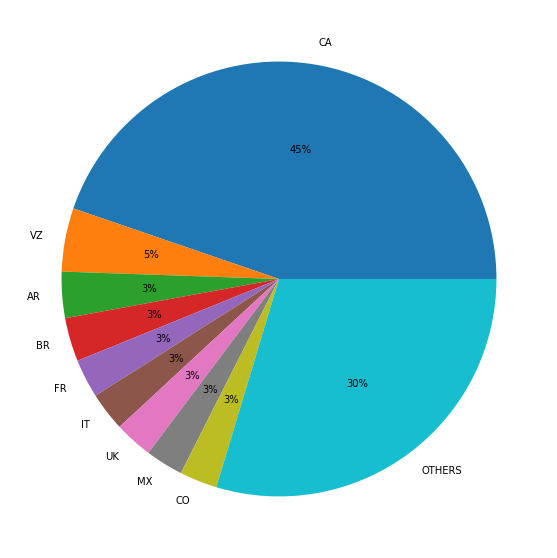

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(top_10.Number,labels=['CA','VZ','AR','BR','FR','IT','UK','MX','CO','OTHERS'],autopct='%0.f%%')
plt.show()

In [ ]:
# sale - from str to month
def extract_year_month(row):
    if type(row) is str:
        return row[:7]
    else:
        return np.nan

mrap['sale_date_1_monthly'] = mrap['sale_date_1'].apply(extract_year_month)
mrap['sale_date_2_monthly'] = mrap['sale_date_2'].apply(extract_year_month)
mrap['sale_date_3_monthly'] = mrap['sale_date_3'].apply(extract_year_month)
# mrap['CurrentSaleContract_Monthly'] = mrap['CurrentSaleContractDate'].apply(extract_year_month)
# mrap['PrevSaleRecording_Monthly'] = mrap['PrevSaleRecordingDate'].apply(extract_year_month)
# mrap['PrevSaleContract_Monthly'] = mrap['PrevSaleContractDate'].apply(extract_year_month)

In [ ]:
# sale - from str to month
def extract_year(row):
    if type(row) is str:
        return row[:4]
    else:
        return np.nan

In [ ]:
mrap['year'] = mrap['Year'].astype(str).apply(extract_year)

In [ ]:
mrap['year'].value_counts()

2021    922474
Name: year, dtype: int64

In [ ]:
mrap['sale_date_2_monthly'].value_counts()

1900-01    159619
2014-04      3341
2013-06      3242
2015-06      3171
2014-03      3139
            ...  
1966-08         1
1969-04         1
1970-02         1
1956-09         1
1969-09         1
Name: sale_date_2_monthly, Length: 712, dtype: int64

In [ ]:
mrap['created_date'] = today

In [ ]:
mrap['created_date']

0         2022-07-06
1         2022-07-06
2         2022-07-06
3         2022-07-06
4         2022-07-06
             ...    
922469    2022-07-06
922470    2022-07-06
922471    2022-07-06
922472    2022-07-06
922473    2022-07-06
Name: created_date, Length: 922474, dtype: object

In [ ]:
def calculateDiffDate(df, col1, col2):
    '''
    Calculate the difference between two dates with format in string
    '''
    new_df = df[[col1, col2]].copy()
    new_df[col1] = pd.to_datetime(new_df[col1], infer_datetime_format=True)
    new_df[col2] = pd.to_datetime(new_df[col2], infer_datetime_format=True)
    difference = new_df[col1] - new_df[col2]
    
    return difference.astype('str')


In [ ]:
long_time_sale=mrap[['Folio','last_market_sale_date', 'created_date']]

In [ ]:
long_time_sale['long_sale'] = calculateDiffDate(mrap,'created_date', 'last_market_sale_date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
long_time_sale['long_time_sale']=(long_time_sale['long_sale'].str.split(' ')).str.get(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
long_time_sale

,Folio,last_market_sale_date,created_date,long_sale,long_time_sale
0,0101000000020,2021-06-23,2022-07-06,378 days,378
1,0101000000022,1900-01-01,2022-07-06,44746 days,44746
2,0101000000026,1900-01-01,2022-07-06,44746 days,44746
3,0101000000028,1900-01-01,2022-07-06,44746 days,44746
4,0101000000030,2021-06-23,2022-07-06,378 days,378
...,...,...,...,...,...
922469,3660170162200,2016-09-07,2022-07-06,2128 days,2128
922470,3660170162210,1900-01-01,2022-07-06,44746 days,44746
922471,3660170162220,1900-01-01,2022-07-06,44746 days,44746
922472,3660170170010,1900-01-01,2022-07-06,44746 days,44746


In [ ]:
# mrap['ListingFailed']= mrap.Status_LISTING=='Fail'
# mrap['ListingFailed']= mrap['ListingFailed'].map({True:1,False:0})
mrap['long_time_sale']= long_time_sale.apply(lambda row: 1 if int(row['long_time_sale'])>9000 else 0,axis=1)

In [ ]:
mrap['long_time_sale'].value_counts()

0    466125
1    456349
Name: long_time_sale, dtype: int64

In [ ]:
mrap.to_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_4.csv", header=True, index=False, sep='|')

In [ ]:
mrap = pd.read_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_4.csv", on_bad_lines='warn', low_memory=False, sep='|')

In [ ]:
mrap.shape

(922474, 90)

In [ ]:
import datetime

In [ ]:
mrap['dif_dates'] = mrap.apply(lambda row: (today - datetime.datetime.strptime(row['sale_date_1'][0:10], '%Y-%m-%d').date()).days if (str(row['sale_qual_1'])[0][0] == '1' ) else (today - datetime.datetime.strptime(row['sale_date_2'][0:10], '%Y-%m-%d').date()).days if (str(row['sale_qual_2'])[0][0] == '1' ) else (today - datetime.datetime.strptime(row['sale_date_3'][0:10], '%Y-%m-%d').date()).days if ( str(row['sale_qual_3'])[0][0] == '1') else 0, axis=1)
mrap['gross_margin'] = mrap.apply(lambda row: float(str(row['sale_amt_1']))- float(str(row['sale_amt_2'])) if (str(row['sale_qual_1'])[0][0] == '1'and str(row['sale_qual_2'])[0][0] == '1') else float(str(row['sale_amt_1']))- float(str(row['sale_amt_3'])) if (str(row['sale_qual_1'])[0][0] == '1'and str(row['sale_qual_3'])[0][0] == '1') else float(str(row['sale_amt_2']))- float(str(row['sale_amt_3'])) if (str(row['sale_qual_2'])[0][0] == '1'and str(row['sale_qual_3'])[0][0] == '1') else np.nan, axis=1)

In [ ]:
# company owned
companies= ['P&D','LIMITED','HOLDINGS','LLC','PARTNERSHIP','LP','CORP','INC','TRS','CHURCH','ARMY','INVESTMENTS']
company_ship= [ ' CO ' , ' PA ' , ' TR ' , ' TS ' , ' CN ' , ' LL ' , ' LS ' , ' LC ' , ' LP ' , ' AS ' , ' CT ' , ' PS ' ] 

In [ ]:
# mrap['comp'] = mrap.apply(lambda row: 1 if any(company in row['full_owner_name'] for company in companies) else 0, axis=1)
mrap['comp_ship'] = mrap.apply(lambda row: 1 if any(company in row['full_owner_name'] for company in company_ship) else 0, axis=1)

KeyboardInterrupt: ignored

In [ ]:
mrap['any_corp'] = mrap.apply(lambda row: 1 if row['comp_ship']==1 | row['comp'] == 1 else 0, axis=1)

In [ ]:
mrap['diff_dates']= mrap['dif_dates'][0].days

In [ ]:
mrap['diff_dates']

0         380
1         380
2         380
3         380
4         380
         ... 
922469    380
922470    380
922471    380
922472    380
922473    380
Name: diff_dates, Length: 922474, dtype: int64

In [ ]:
mrap['diff_dates']= mrap.apply(lambda row: row['dif_dates'].days, axis=1)

AttributeError: ignored

In [ ]:
mrap['flipped']= mrap.apply(lambda row: 1 if (row['gross_margin'] > 0) & (row['dif_dates'] <=365) else 0, axis=1)
mrap['whole_sale']= mrap.apply(lambda row: 1 if (row['gross_margin'] > 0) & (row['dif_dates'] <=30) else 0, axis=1)

In [ ]:
mrap.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Date 1,Sale Date 2,Sale Date 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3,last_market_sale_date,no_market_sale_date,adverse_pos_ind,year,sale_date_1_monthly,sale_date_2_monthly,sale_date_3_monthly,created_date,long_time_sale,dif_dates,gross_margin,comp,comp_ship,diff_dates,flipped,whole_sale
0,101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,06/23/2021,05/24/2013,07/01/2007,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01,2021-06-23,0,0,2021,2021-06,2013-05,2007-07,2022-07-06,0,380,24500000.0,1,0,380,0,0
1,101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,8617.0,COMMERCIAL NEIGHBORHOOD,6100,33132,0.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1,0,2021,1900-01,1900-01,1900-01,2022-07-06,1,0,NaN,0,0,380,0,0
2,101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,NaN,SANTA CLARA APARTMENTS I LLC,0,0,9017.0,COMMERCIAL NEIGHBORHOOD,6100,33142,2003.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1,0,2021,1900-01,1900-01,1900-01,2022-07-06,1,0,NaN,1,0,380,0,0


In [ ]:
weights= {"hex_ind":2,"absent_owner":5,"adverse_pos_ind":10,"estate_of":6,"life_estate":4,"any_corp":3}

In [ ]:
indicators_list=['hex_ind','absent_owner','adverse_pos_ind','estate_of','life_estate','any_corp']

In [ ]:
weight ={'homestead_ind_p': 2,'ao_vs_hex': 5,'pfc_flag': 7,'on_auction': 8,'adverse_possesion': 10,'no_loans': 3,'absentee_owner': 2,'estate_1_or_2': 6,'lifeestate_1_or_2': 4,'any_corp_ind_p': 3,'year_built': 3,'out_state_owner': 3,'out_of_county': 3,'no_sales': 1,'long_time_sale': 2,'preforeclosure_flag': 7,'foreclosure_flag':1,'probate_flag': 7,'eviction_flag': 5,'delinquency_flag': 6,'flipped':0,'weighted_count':0,'core_count':0,}

In [ ]:
mrap['weighted_count'] = 0
for i in indicators_list:
    mrap['weighted_count']+=mrap[i]*weights.get(i)

In [ ]:
mrap.head(3)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Date 1,Sale Date 2,Sale Date 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3,last_market_sale_date,no_market_sale_date,adverse_pos_ind,year,sale_date_1_monthly,sale_date_2_monthly,sale_date_3_monthly,created_date,long_time_sale,dif_dates,gross_margin,comp,comp_ship,diff_dates,flipped,whole_sale,any_corp,weighted_count
0,101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,06/23/2021,05/24/2013,07/01/2007,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01,2021-06-23,0,0,2021,2021-06,2013-05,2007-07,2022-07-06,0,380,24500000.0,1,0,380,0,0,0,2
1,101000000022,245 NE 1 AVE,Miami,33132-0000,2021.0,0.0,0.0,347164191.0,347164191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,6100 - COMMERCIAL - NEIGHBORHOOD,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,701 NW 1 CT STE 1700,MIAMI,FL,33136-3902,NaN,ALL THAT PORTION OF METRO RAIL,LYG WITHIN THE BDRY OF THE CITY,OF MIAMI LESS PB 158-31 & LESS,PB 158-32 & PB 160-93 & LESS,PB 127-85& LESS PB 126-48 & LESS,COVINGTON MANOR PB 13-32 LOTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1,0,1,0,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,MIAMI-DADE COUNTY MIAMI-DADE TRANSIT,0,0,8617.0,COMMERCIAL NEIGHBORHOOD,6100,33132,0.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1,0,2021,1900-01,1900-01,1900-01,2022-07-06,1,0,NaN,0,0,380,0,0,0,2
2,101000000026,1250 NW 21 ST,Miami,33142-7753,2021.0,0.0,0.0,11900000.0,11705479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5994376.0,0.0,0.0,0.0,0.0,0.0,100.0,6100 - COMMERCIAL - NEIGHBORHOOD,SANTA CLARA APARTMENTS I LLC,NaN,401 WILSHIRE BLVD #1070,SANTA MONICA,CA,90401,USA,SANTA CLARA STATION,PB 126-42,PORT OF TRACT A PER LEASE,AGREEMENT BETWEEN MIAMI DADE CO,& SANTA CLARA APARTMENTS I LLC,OR# 32818-2366,169280.0,0.0,0.0,352.0,9.0,208.0,2003.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,169280.0,169280.0,NaN,0.0,1,0,0,1,SANTA CLARA APARTMENTS I LLC,NaN,SANTA CLARA APARTMENTS I LLC,0,0,9017.0,COMMERCIAL NEIGHBORHOOD,6100,33142,2003.0,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1,0,2021,1900-01,1900-01,1900-01,2022-07-06,1,0,NaN,1,0,380,0,0,0,2


In [ ]:
mrap.drop(columns=['comp_ship',
'comp',
'diff_dates',
'sale_date_1_monthly',
'sale_date_2_monthly',
'sale_date_3_monthly',
'created_date',
'Sale Date 1',
'Sale Date 2',
'Sale Date 3',
'YearBuilt',
'Owner1',
'Owner2',
'Zoning',
'HEX',
'Year'],inplace=True)


In [ ]:
#to db
mrap.to_csv("/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Columns/munroll_correct_5.csv", header=True, index=False, sep='|')

PSEA

In [ ]:
start = time.time()
psea = pd.read_csv(os.path.join(os.getcwd(),'/content/drive/MyDrive/Blackwood Flipped Houses/Important Files/Munroll & PSEA files/Public Sales Extract AllYears.csv'),skiprows=3,low_memory=False)
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')
psea.head()

Execution time: 0.61 min


,Folio,Municipality,SaleID,OR_BK,OR_PG,TransferCode,Grantor(seller),Grantee(buyer),DateOfSale,Price,VI,QU_FLG,DORCode,SiteAddress,StreetNumber,StreetPrefix,StreetName,StreetNumberSuffix,StreetSuffix,StreetDirection,CondoUnit,SiteCity,SiteZip,MailingAddressLine1,MailingAddressLine2,MailingAddressLine3,City,State,Zip,Country,SalesCode,Owner1,Owner2,Owner3,Zoning,AdjustedSqFt,LotSF,Acres,Bedrooms,Baths,1/2 Baths,LivingUnits,Stories,NumberOfBuilding,YearBuilt,EffectiveYearBuilt,LivingSqFt,ActualSqFt
0,0101000000020,1.0,5.0,32602.0,3521,WDE,16 SE 2ND STREET LLC,16 SE 2ND STREET DOWNTOWN,6/23/2021 12:00:00 AM,46000000.0,V,Q,2865.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Miami,33131-2103,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,5.0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,6401,0.0,60198.0,1.3820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0101000000020,1.0,4.0,28688.0,1169,DEE,BURDINES 1225 LLC,16 SE 2ND ST LLC,5/24/2013 12:00:00 AM,32620638.0,V,U,2865.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Miami,33131-2103,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,12.0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,6401,0.0,60198.0,1.3820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0101000000020,1.0,1.0,25843.0,0025,NaN,NaN,NaN,7/1/2007 12:00:00 AM,21500000.0,V,U,2865.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Miami,33131-2103,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,3.0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,6401,0.0,60198.0,1.3820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0101000000020,1.0,2.0,21695.0,3500,NaN,NaN,NaN,9/1/2003 12:00:00 AM,8800000.0,I,Q,2865.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Miami,33131-2103,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,2.0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,6401,0.0,60198.0,1.3820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0101000000020,1.0,3.0,14202.0,2339,NaN,NaN,NaN,8/1/1989 12:00:00 AM,6200000.0,I,Q,2865.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Miami,33131-2103,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,2.0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,NaN,6401,0.0,60198.0,1.3820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def dif_days(df):
    # Change column DifDates
    for j in range(0,len(df)):
        df.loc[j,'DifDates'] = str(df['DifDates'].iloc[j])
    # Fill column GrossMargin
    for j in range(0,len(df)):
        df.loc[j,'Days'] = str(df['DifDates'].iloc[j]).split()[0]  

In [ ]:
psea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649030 entries, 0 to 3649029
Data columns (total 49 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Folio                object        
 1   Municipality         float64       
 2   SaleID               float64       
 3   OR_BK                float64       
 4   OR_PG                object        
 5   TransferCode         object        
 6   Grantor(seller)      object        
 7   Grantee(buyer)       object        
 8   DateOfSale           object        
 9   Price                float64       
 10  VI                   object        
 11  QU_FLG               object        
 12  DORCode              float64       
 13  SiteAddress          object        
 14  StreetNumber         float64       
 15  StreetPrefix         object        
 16  StreetName           object        
 17  StreetNumberSuffix   object        
 18  StreetSuffix         object        
 19  StreetDirection      

In [ ]:
psea['DateSale']=psea.DateOfSale.astype({'DateOfSale': 'datetime64[ns]'})
# psea['DateSale']=psea.DateOfSale.str[0:10] 
psea.QU_FLG.value_counts()
qualified=psea[psea.QU_FLG=='Q']

In [ ]:
mrap.head(1)

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Zoning,Owner1,Owner2,Mailing Address,City,State,Mailing Zip,Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Date 1,Sale Date 2,Sale Date 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt,CRA,hex_value,hex_ind,absent_owner,mail_vs_country,mail_vs_state,owner_1,owner_2,full_owner_name,life_estate,estate_of,land_use_code,zoning_names,zoning_codes,zip_codes,year_built,sale_type_1,sale_type_2,sale_type_3,sale_qual_1,sale_qual_2,sale_qual_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_date_1,sale_date_2,sale_date_3,last_market_sale_date,no_market_sale_date,adverse_pos_ind,year,sale_date_1_monthly,sale_date_2_monthly,sale_date_3_monthly,created_date,long_time_sale
0,101000000020,NaN,Miami,33131-2103,2021.0,27992070.0,6789.0,27998859.0,20529048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20529048.0,0.0,0.0,0.0,0.0,0.0,101.0,6401 - COMMERCIAL,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,1000 BRICKELL AVE STE 400,MIAMI,FL,33131,USA,MIAMI NORTH PB B-41,BEG X OF E/L OF SO MIAMI AVE &,S/L SE 2 DT TH E350FT S149FT,W139.76FT S55.32FT N 84 DEG,W126.02FT NWLY A/D 49.35FT N 81,DEG W13.92FT N 8 DEG E38.75FT,0.0,60198.0,0.0,0.0,0.0,0.0,0.0,0.0,06/23/2021,05/24/2013,07/01/2007,Paving - Asphalt,Light Standard - 10-30 ft High - 4 Fixtures,NaN,0.0,0.0,NaN,0.0,1,0,0,0,16 SE 2ND STREET DOWNTOWN,INVESTMENT LLC,16 SE 2ND STREET DOWNTOWN INVESTMENT LLC,0,0,2865.0,0,6401,33131,0.0,5.0,12.0,3.0,1,0,1,46000000.0,32620638.0,21500000.0,2021-06-23,2013-05-24,2007-07-01,2021-06-23,0,0,2021,2021-06,2013-05,2007-07,2022-07-06,0


In [ ]:
qualified=psea[psea.QU_FLG=='Q']

In [ ]:
qualified=mrap[mrap.no_market_sale_date==0]

In [ ]:
qualified.shape

(884522, 90)

In [ ]:
# qualified.groupby('Folio').SaleID.count().value_counts()
qualified.sale_type_1.value_counts()

1.0     376377
0.0     199499
11.0    176618
12.0     24846
5.0      18810
14.0     14515
2.0      13732
3.0      12791
37.0     11704
30.0     11057
18.0      6431
19.0      5907
98.0      4424
43.0      2183
38.0      1653
17.0      1342
40.0      1092
16.0       686
32.0       289
39.0       264
35.0       106
31.0        90
13.0        38
20.0        16
36.0        13
34.0        13
42.0        12
33.0         7
21.0         3
15.0         2
6.0          2
Name: sale_type_1, dtype: int64

In [ ]:
sales = qualified.sale_type_1.value_counts().rename_axis('number_of_sales').reset_index(name='quantity')
sales['percentage'] = sales.apply(lambda x: x['quantity']*100/sales.quantity.sum(),axis=1)
top_5_sales = sales.drop(list(range(5,len(qualified.sale_type_1.value_counts().tolist()))))
top_5_sales['percentage'] = top_5_sales.apply(lambda x: x['quantity']*100/sales.quantity.sum(),axis=1)
top_5_sales = top_5_sales.append({'number_of_sales':'>5','quantity':(sales.quantity.sum()-top_5_sales.quantity.sum()),'percentage':(100-top_5_sales.percentage.sum())},ignore_index=True)
top_5_sales

,number_of_sales,quantity,percentage
0,1.0,376377,42.551457
1,0.0,199499,22.554442
2,11.0,176618,19.967621
3,12.0,24846,2.808975
4,5.0,18810,2.126572
5,>5,88372,9.990933


In [ ]:
sales = qualified.sale_type_2.value_counts().rename_axis('number_of_sales').reset_index(name='quantity')
sales['percentage'] = sales.apply(lambda x: x['quantity']*100/sales.quantity.sum(),axis=1)
top_5_sales = sales.drop(list(range(5,len(qualified.sale_type_2.value_counts().tolist()))))
top_5_sales['percentage'] = top_5_sales.apply(lambda x: x['quantity']*100/sales.quantity.sum(),axis=1)
top_5_sales = top_5_sales.append({'number_of_sales':'>5','quantity':(sales.quantity.sum()-top_5_sales.quantity.sum()),'percentage':(100-top_5_sales.percentage.sum())},ignore_index=True)
top_5_sales

,number_of_sales,quantity,percentage
0,0.0,279558,36.654211
1,1.0,232373,30.467556
2,11.0,106180,13.921777
3,12.0,52369,6.866355
4,2.0,24220,3.175602
5,>5,67990,8.914500


In [ ]:
sales = qualified.sale_type_3.value_counts().rename_axis('number_of_sales').reset_index(name='quantity')
sales['percentage'] = sales.apply(lambda x: x['quantity']*100/sales.quantity.sum(),axis=1)
top_5_sales = sales.drop(list(range(5,len(qualified.sale_type_3.value_counts().tolist()))))
top_5_sales['percentage'] = top_5_sales.apply(lambda x: x['quantity']*100/sales.quantity.sum(),axis=1)
top_5_sales = top_5_sales.append({'number_of_sales':'>5','quantity':(sales.quantity.sum()-top_5_sales.quantity.sum()),'percentage':(100-top_5_sales.percentage.sum())},ignore_index=True)
top_5_sales

,number_of_sales,quantity,percentage
0,0.0,285527,46.662668
1,1.0,154317,25.219482
2,11.0,55340,9.044021
3,12.0,48521,7.929615
4,2.0,25591,4.182247
5,>5,42600,6.961967


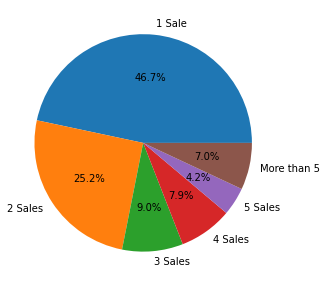

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(top_5_sales.quantity,labels=['1 Sale','2 Sales','3 Sales','4 Sales','5 Sales','More than 5'],autopct='%0.1f%%')
plt.show()

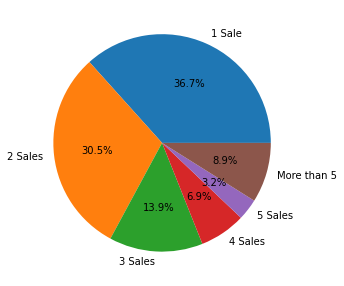

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(top_5_sales.quantity,labels=['1 Sale','2 Sales','3 Sales','4 Sales','5 Sales','More than 5'],autopct='%0.1f%%')
plt.show()

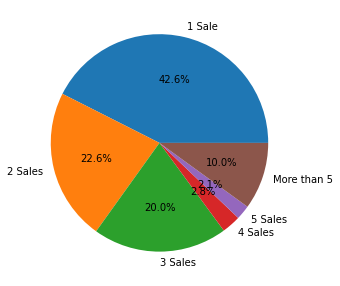

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(top_5_sales.quantity,labels=['1 Sale','2 Sales','3 Sales','4 Sales','5 Sales','More than 5'],autopct='%0.1f%%')
plt.show()

In [ ]:
# create a new data set without only 1 sale
qualified_sales = qualified

In [ ]:
view4 = qualified[['Folio','sale_type_1','sale_type_2','sale_type_3','sale_date_1','sale_date_2','sale_date_3','sale_amt_1','sale_amt_2','sale_amt_3','sale_qual_1','sale_qual_2','sale_qual_3']]

In [ ]:
view4

,Folio,sale_type_1,sale_type_2,sale_type_3,sale_date_1,sale_date_2,sale_date_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_qual_1,sale_qual_2,sale_qual_3
0,101000000020,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1
4,101000000030,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1
8,101000000260,2.0,1.0,0.0,2017-06-30,2014-07-10,2005-09-01,37250000.0,19000000.0,17028000.0,1,1,1
13,101000000320,11.0,3.0,NaN,2018-11-16,2003-11-01,1900-01-01,424500.0,18000100.0,NaN,0,1,-1
22,101000000555,18.0,18.0,NaN,2018-04-05,2018-01-31,1900-01-01,5250000.0,7000000.0,NaN,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922468,3660170162190,0.0,0.0,NaN,1993-06-01,1991-12-01,1900-01-01,74000.0,80000.0,NaN,1,1,-1
922469,3660170162200,1.0,12.0,12.0,2016-09-07,2013-11-20,2013-01-10,231500.0,175000.0,28700.0,1,0,0
922470,3660170162210,11.0,1.0,11.0,2014-12-26,2014-08-26,2014-03-13,69500.0,174000.0,100.0,0,1,0
922472,3660170170010,11.0,1.0,0.0,2018-10-04,2005-01-01,2002-11-01,100.0,0.0,125000.0,0,1,1


In [ ]:
view5 = view4.head(20)
view5 = view5.assign(DifDates=np.nan,GrossMargin=np.nan)
view5 = view5.reset_index(drop=True)
view5 = view5.copy()   
view5

,Folio,sale_type_1,sale_type_2,sale_type_3,sale_date_1,sale_date_2,sale_date_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_qual_1,sale_qual_2,sale_qual_3,DifDates,GrossMargin
0,101000000020,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,NaN,NaN
1,101000000030,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,NaN,NaN
2,101000000260,2.0,1.0,0.0,2017-06-30,2014-07-10,2005-09-01,37250000.0,19000000.0,17028000.0,1,1,1,NaN,NaN
3,101000000320,11.0,3.0,NaN,2018-11-16,2003-11-01,1900-01-01,424500.0,18000100.0,NaN,0,1,-1,NaN,NaN
4,101000000555,18.0,18.0,NaN,2018-04-05,2018-01-31,1900-01-01,5250000.0,7000000.0,NaN,1,1,-1,NaN,NaN
5,101010001010,0.0,2.0,0.0,1999-07-01,1999-03-01,1984-06-01,160000.0,225000.0,125000.0,1,1,1,NaN,NaN
6,101010001011,0.0,NaN,NaN,1999-04-01,1900-01-01,1900-01-01,125000.0,NaN,NaN,1,-1,-1,NaN,NaN
7,101010001030,1.0,NaN,NaN,1984-04-11,1900-01-01,1900-01-01,0.0,NaN,NaN,1,-1,-1,NaN,NaN
8,101010401010,17.0,NaN,NaN,2010-06-15,1900-01-01,1900-01-01,300000.0,NaN,NaN,0,-1,-1,NaN,NaN
9,101010401020,0.0,1.0,3.0,2003-04-01,1990-12-01,1983-05-01,125000.0,0.0,95000.0,1,1,1,NaN,NaN


In [ ]:
import datetime

In [ ]:
a = datetime.datetime.strptime(mrap['sale_date_1'][0][0:10], '%Y-%m-%d')
# a=datetime.date.today()
b = a.date()
c = today- b
c

datetime.timedelta(days=379)

In [ ]:
view5['DifDates'] = view5.apply(lambda row: today - datetime.datetime.strptime(row['sale_date_1'][0:10], '%Y-%m-%d').date() if (str(row['sale_qual_1'])[0][0] == '1' ) else today - datetime.datetime.strptime(row['sale_date_2'][0:10], '%Y-%m-%d').date() if (str(row['sale_qual_2'])[0][0] == '1' ) else today - datetime.datetime.strptime(row['sale_date_3'][0:10], '%Y-%m-%d').date() if ( str(row['sale_qual_3'])[0][0] == '1') else 0, axis=1)

In [ ]:
view5

,Folio,sale_type_1,sale_type_2,sale_type_3,sale_date_1,sale_date_2,sale_date_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_qual_1,sale_qual_2,sale_qual_3,DifDates,GrossMargin
0,101000000020,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,"379 days, 0:00:00",NaN
1,101000000030,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,"379 days, 0:00:00",NaN
2,101000000260,2.0,1.0,0.0,2017-06-30,2014-07-10,2005-09-01,37250000.0,19000000.0,17028000.0,1,1,1,"1833 days, 0:00:00",NaN
3,101000000320,11.0,3.0,NaN,2018-11-16,2003-11-01,1900-01-01,424500.0,18000100.0,NaN,0,1,-1,"6823 days, 0:00:00",NaN
4,101000000555,18.0,18.0,NaN,2018-04-05,2018-01-31,1900-01-01,5250000.0,7000000.0,NaN,1,1,-1,"1554 days, 0:00:00",NaN
5,101010001010,0.0,2.0,0.0,1999-07-01,1999-03-01,1984-06-01,160000.0,225000.0,125000.0,1,1,1,"8407 days, 0:00:00",NaN
6,101010001011,0.0,NaN,NaN,1999-04-01,1900-01-01,1900-01-01,125000.0,NaN,NaN,1,-1,-1,"8498 days, 0:00:00",NaN
7,101010001030,1.0,NaN,NaN,1984-04-11,1900-01-01,1900-01-01,0.0,NaN,NaN,1,-1,-1,"13966 days, 0:00:00",NaN
8,101010401010,17.0,NaN,NaN,2010-06-15,1900-01-01,1900-01-01,300000.0,NaN,NaN,0,-1,-1,0,NaN
9,101010401020,0.0,1.0,3.0,2003-04-01,1990-12-01,1983-05-01,125000.0,0.0,95000.0,1,1,1,"7037 days, 0:00:00",NaN


In [ ]:
view5['DifDates'] = view5.apply(lambda row: today - datetime.datetime.strptime(row['sale_date_1'][0:10], '%Y-%m-%d').date() if (str(row['sale_qual_1'])[0][0] == '1' ) else today - datetime.datetime.strptime(row['sale_date_2'][0:10], '%Y-%m-%d').date() if (str(row['sale_qual_2'])[0][0] == '1' ) else today - datetime.datetime.strptime(row['sale_date_3'][0:10], '%Y-%m-%d').date() if ( str(row['sale_qual_3'])[0][0] == '1') else 0, axis=1)
view5['GrossMargin'] = view5.apply(lambda row: float(str(row['sale_amt_1']))- float(str(row['sale_amt_2'])) if (str(row['sale_qual_1'])[0][0] == '1'and str(row['sale_qual_2'])[0][0] == '1') else float(str(row['sale_amt_1']))- float(str(row['sale_amt_3'])) if (str(row['sale_qual_1'])[0][0] == '1'and str(row['sale_qual_3'])[0][0] == '1') else float(str(row['sale_amt_2']))- float(str(row['sale_amt_3'])) if (str(row['sale_qual_2'])[0][0] == '1'and str(row['sale_qual_3'])[0][0] == '1') else np.nan, axis=1)

In [ ]:
def fill(df):

    # Fill column GrossMargin
    for j in range(0,len(df)-1):
        if df['sale_qual_1'].iloc[j]=='1' and df['sale_qual_2'].iloc[j]=='1':
            df.loc[j,'GrossMargin'] = df['sale_amt_1'].iloc[j]-df['sale_amt_2'].iloc[j]  
        elif df['sale_qual_1'].iloc[j]=='1' and df['sale_qual_3'].iloc[j]=='1':
            df.loc[j,'GrossMargin'] = df['sale_amt_1'].iloc[j]-df['sale_amt_3'].iloc[j]  
        elif df['sale_qual_2'].iloc[j]=='1' and df['sale_qual_3'].iloc[j]=='1':
            df.loc[j,'GrossMargin'] = df['sale_amt_2'].iloc[j]-df['sale_amt_3'].iloc[j]  

In [ ]:
fill(view5)
view5

,Folio,sale_type_1,sale_type_2,sale_type_3,sale_date_1,sale_date_2,sale_date_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_qual_1,sale_qual_2,sale_qual_3,DifDates,GrossMargin
0,101000000020,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,"379 days, 0:00:00",NaN
1,101000000030,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,"379 days, 0:00:00",NaN
2,101000000260,2.0,1.0,0.0,2017-06-30,2014-07-10,2005-09-01,37250000.0,19000000.0,17028000.0,1,1,1,"1833 days, 0:00:00",NaN
3,101000000320,11.0,3.0,NaN,2018-11-16,2003-11-01,1900-01-01,424500.0,18000100.0,NaN,0,1,-1,"6823 days, 0:00:00",NaN
4,101000000555,18.0,18.0,NaN,2018-04-05,2018-01-31,1900-01-01,5250000.0,7000000.0,NaN,1,1,-1,"1554 days, 0:00:00",NaN
5,101010001010,0.0,2.0,0.0,1999-07-01,1999-03-01,1984-06-01,160000.0,225000.0,125000.0,1,1,1,"8407 days, 0:00:00",NaN
6,101010001011,0.0,NaN,NaN,1999-04-01,1900-01-01,1900-01-01,125000.0,NaN,NaN,1,-1,-1,"8498 days, 0:00:00",NaN
7,101010001030,1.0,NaN,NaN,1984-04-11,1900-01-01,1900-01-01,0.0,NaN,NaN,1,-1,-1,"13966 days, 0:00:00",NaN
8,101010401010,17.0,NaN,NaN,2010-06-15,1900-01-01,1900-01-01,300000.0,NaN,NaN,0,-1,-1,0,NaN
9,101010401020,0.0,1.0,3.0,2003-04-01,1990-12-01,1983-05-01,125000.0,0.0,95000.0,1,1,1,"7037 days, 0:00:00",NaN


In [ ]:
view5['GrossMargin'] = view5.apply(lambda row: float(str(row['sale_amt_1']))- float(str(row['sale_amt_2'])) if (str(row['sale_qual_1'])[0][0] == '1'and str(row['sale_qual_2'])[0][0] == '1') else float(str(row['sale_amt_1']))- float(str(row['sale_amt_3'])) if (str(row['sale_qual_1'])[0][0] == '1'and str(row['sale_qual_3'])[0][0] == '1') else float(str(row['sale_amt_2']))- float(str(row['sale_amt_3'])) if (str(row['sale_qual_2'])[0][0] == '1'and str(row['sale_qual_3'])[0][0] == '1') else np.nan, axis=1)

In [ ]:
view5

,Folio,sale_type_1,sale_type_2,sale_type_3,sale_date_1,sale_date_2,sale_date_3,sale_amt_1,sale_amt_2,sale_amt_3,sale_qual_1,sale_qual_2,sale_qual_3,DifDates,GrossMargin
0,101000000020,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,"379 days, 0:00:00",24500000.0
1,101000000030,5.0,12.0,3.0,2021-06-23,2013-05-24,2007-07-01,46000000.0,32620638.0,21500000.0,1,0,1,"379 days, 0:00:00",24500000.0
2,101000000260,2.0,1.0,0.0,2017-06-30,2014-07-10,2005-09-01,37250000.0,19000000.0,17028000.0,1,1,1,"1833 days, 0:00:00",18250000.0
3,101000000320,11.0,3.0,NaN,2018-11-16,2003-11-01,1900-01-01,424500.0,18000100.0,NaN,0,1,-1,"6823 days, 0:00:00",NaN
4,101000000555,18.0,18.0,NaN,2018-04-05,2018-01-31,1900-01-01,5250000.0,7000000.0,NaN,1,1,-1,"1554 days, 0:00:00",-1750000.0
5,101010001010,0.0,2.0,0.0,1999-07-01,1999-03-01,1984-06-01,160000.0,225000.0,125000.0,1,1,1,"8407 days, 0:00:00",-65000.0
6,101010001011,0.0,NaN,NaN,1999-04-01,1900-01-01,1900-01-01,125000.0,NaN,NaN,1,-1,-1,"8498 days, 0:00:00",NaN
7,101010001030,1.0,NaN,NaN,1984-04-11,1900-01-01,1900-01-01,0.0,NaN,NaN,1,-1,-1,"13966 days, 0:00:00",NaN
8,101010401010,17.0,NaN,NaN,2010-06-15,1900-01-01,1900-01-01,300000.0,NaN,NaN,0,-1,-1,0,NaN
9,101010401020,0.0,1.0,3.0,2003-04-01,1990-12-01,1983-05-01,125000.0,0.0,95000.0,1,1,1,"7037 days, 0:00:00",125000.0


In [ ]:
def fill(df):
    # Fill column DifDates
    for j in range(0,len(df)-1):
        if df['Folio'].iloc[j]==df['Folio'].iloc[j+1]:
            df.loc[j,'DifDates'] = df['DateSale'].iloc[j]-df['DateSale'].iloc[j+1]
    # Fill column GrossMargin
    for j in range(0,len(df)-1):
        if df['Folio'].iloc[j]==df['Folio'].iloc[j+1]:
            df.loc[j,'GrossMargin'] = df['Price'].iloc[j]-df['Price'].iloc[j+1]  

In [ ]:
view5 = view4.head(50)
view5 = view5.assign(DifDates=np.nan,GrossMargin=np.nan)
view5 = view5.reset_index(drop=True)
view5 = view5.copy()   
view5

,Folio,SaleID,DateSale,Price,DifDates,GrossMargin
0,0101000000020,5.0,2021-06-23,46000000.0,NaN,NaN
1,0101000000020,2.0,2003-09-01,8800000.0,NaN,NaN
2,0101000000020,3.0,1989-08-01,6200000.0,NaN,NaN
3,0101000000030,5.0,2021-06-23,46000000.0,NaN,NaN
4,0101000000030,2.0,2003-09-01,8800000.0,NaN,NaN
5,0101000000030,3.0,1989-08-01,6200000.0,NaN,NaN
6,0101000000260,6.0,2017-06-30,37250000.0,NaN,NaN
7,0101000000260,5.0,2014-07-10,19000000.0,NaN,NaN
8,0101000000260,1.0,2005-09-01,17028000.0,NaN,NaN
9,0101000000260,4.0,1991-02-01,2637500.0,NaN,NaN


In [ ]:
view1 = qualified[['Folio','SaleID','DateSale','Price']]

In [ ]:
view1.isna().sum().sort_values(ascending=False)

Folio       0
SaleID      0
DateSale    0
Price       0
dtype: int64

In [ ]:
view1.DateSale.value_counts()

2004-06-01    9882
2005-03-01    9580
2005-04-01    9420
2004-12-01    9308
2005-05-01    9214
              ... 
1973-02-21       1
1999-03-15       1
2015-01-10       1
2011-09-25       1
2006-07-25       1
Name: DateSale, Length: 8156, dtype: int64

In [ ]:
view1 = view1.copy()

In [ ]:
view1['DateSale']=pd.to_datetime(view1['DateSale'],format='%m/%d/%Y')

In [ ]:
view1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242998 entries, 0 to 3649028
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Folio     object        
 1   SaleID    float64       
 2   DateSale  datetime64[ns]
 3   Price     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 85.6+ MB


In [ ]:
view2 = view1.head(20)
view2 = view2.assign(DifDates=np.nan,GrossMargin=np.nan)
view2 = view2.reset_index(drop=True)
view2 = view2.copy()   
view2

,Folio,SaleID,DateSale,Price,DifDates,GrossMargin
0,0101000000020,5.0,2021-06-23,46000000.0,NaN,NaN
1,0101000000020,2.0,2003-09-01,8800000.0,NaN,NaN
2,0101000000020,3.0,1989-08-01,6200000.0,NaN,NaN
3,0101000000030,5.0,2021-06-23,46000000.0,NaN,NaN
4,0101000000030,2.0,2003-09-01,8800000.0,NaN,NaN
5,0101000000030,3.0,1989-08-01,6200000.0,NaN,NaN
6,0101000000260,6.0,2017-06-30,37250000.0,NaN,NaN
7,0101000000260,5.0,2014-07-10,19000000.0,NaN,NaN
8,0101000000260,1.0,2005-09-01,17028000.0,NaN,NaN
9,0101000000260,4.0,1991-02-01,2637500.0,NaN,NaN


In [ ]:
def fill(df):
    # Fill column DifDates
    for j in range(0,len(df)-1):
        if df['Folio'].iloc[j]==df['Folio'].iloc[j+1]:
            df.loc[j,'DifDates'] = df['DateSale'].iloc[j]-df['DateSale'].iloc[j+1]
    # Fill column GrossMargin
    for j in range(0,len(df)-1):
        if df['Folio'].iloc[j]==df['Folio'].iloc[j+1]:
            df.loc[j,'GrossMargin'] = df['Price'].iloc[j]-df['Price'].iloc[j+1]  

In [ ]:
fill(view2)
view2

,Folio,SaleID,DateSale,Price,DifDates,GrossMargin
0,0101000000020,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0
1,0101000000020,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0
2,0101000000020,3.0,1989-08-01,6200000.0,NaN,NaN
3,0101000000030,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0
4,0101000000030,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0
5,0101000000030,3.0,1989-08-01,6200000.0,NaN,NaN
6,0101000000260,6.0,2017-06-30,37250000.0,1086 days 00:00:00,18250000.0
7,0101000000260,5.0,2014-07-10,19000000.0,3234 days 00:00:00,1972000.0
8,0101000000260,1.0,2005-09-01,17028000.0,5326 days 00:00:00,14390500.0
9,0101000000260,4.0,1991-02-01,2637500.0,NaN,NaN


In [ ]:
view3=view2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
view3

,Folio,SaleID,DateSale,Price,DifDates,GrossMargin
0,0101000000020,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0
1,0101000000020,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0
3,0101000000030,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0
4,0101000000030,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0
6,0101000000260,6.0,2017-06-30,37250000.0,1086 days 00:00:00,18250000.0
7,0101000000260,5.0,2014-07-10,19000000.0,3234 days 00:00:00,1972000.0
8,0101000000260,1.0,2005-09-01,17028000.0,5326 days 00:00:00,14390500.0
10,0101010001010,1.0,1999-07-01,160000.0,122 days 00:00:00,-65000.0
11,0101010001010,2.0,1999-03-01,225000.0,5386 days 00:00:00,100000.0
15,0101010401030,5.0,2016-03-03,700000.0,385 days 00:00:00,165000.0


In [ ]:
view3 = view3.reset_index(drop=True)
view3 = view3.copy()
view3 = view3.assign(Days=np.nan)

In [ ]:
def dif_days(df):
    # Change column DifDates
    for j in range(0,len(df)):
        df.loc[j,'DifDates'] = str(df['DifDates'].iloc[j])
    # Fill column GrossMargin
    for j in range(0,len(df)):
        df.loc[j,'Days'] = str(df['DifDates'].iloc[j]).split()[0]  

In [ ]:
dif_days(view3)

In [ ]:
view3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Folio        11 non-null     object        
 1   SaleID       11 non-null     float64       
 2   DateSale     11 non-null     datetime64[ns]
 3   Price        11 non-null     float64       
 4   DifDates     11 non-null     object        
 5   GrossMargin  11 non-null     float64       
 6   Days         11 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 744.0+ bytes


In [ ]:
view3

,Folio,SaleID,DateSale,Price,DifDates,GrossMargin,Days
0,0101000000020,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0,6505
1,0101000000020,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0,5144
2,0101000000030,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0,6505
3,0101000000030,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0,5144
4,0101000000260,6.0,2017-06-30,37250000.0,1086 days 00:00:00,18250000.0,1086
5,0101000000260,5.0,2014-07-10,19000000.0,3234 days 00:00:00,1972000.0,3234
6,0101000000260,1.0,2005-09-01,17028000.0,5326 days 00:00:00,14390500.0,5326
7,0101010001010,1.0,1999-07-01,160000.0,122 days 00:00:00,-65000.0,122
8,0101010001010,2.0,1999-03-01,225000.0,5386 days 00:00:00,100000.0,5386
9,0101010401030,5.0,2016-03-03,700000.0,385 days 00:00:00,165000.0,385


In [ ]:
view3['Flipped']=view3.apply(lambda row: 1 if (row.GrossMargin >0) and (int(row['Days'])<365) else 0,axis=1)


In [ ]:
view3

,Folio,SaleID,DateSale,Price,DifDates,GrossMargin,Days,Flipped
0,0101000000020,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0,6505,0
1,0101000000020,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0,5144,0
2,0101000000030,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0,6505,0
3,0101000000030,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0,5144,0
4,0101000000260,6.0,2017-06-30,37250000.0,1086 days 00:00:00,18250000.0,1086,0
5,0101000000260,5.0,2014-07-10,19000000.0,3234 days 00:00:00,1972000.0,3234,0
6,0101000000260,1.0,2005-09-01,17028000.0,5326 days 00:00:00,14390500.0,5326,0
7,0101010001010,1.0,1999-07-01,160000.0,122 days 00:00:00,-65000.0,122,0
8,0101010001010,2.0,1999-03-01,225000.0,5386 days 00:00:00,100000.0,5386,0
9,0101010401030,5.0,2016-03-03,700000.0,385 days 00:00:00,165000.0,385,0


In [ ]:
view3['Wholesale']=view3.apply(lambda row: 1 if (int(row['Days'])<15) else 0,axis=1)

In [ ]:
view3

,Folio,SaleID,DateSale,Price,DifDates,GrossMargin,Days,Flipped,Wholesale
0,0101000000020,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0,6505,0,0
1,0101000000020,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0,5144,0,0
2,0101000000030,5.0,2021-06-23,46000000.0,6505 days 00:00:00,37200000.0,6505,0,0
3,0101000000030,2.0,2003-09-01,8800000.0,5144 days 00:00:00,2600000.0,5144,0,0
4,0101000000260,6.0,2017-06-30,37250000.0,1086 days 00:00:00,18250000.0,1086,0,0
5,0101000000260,5.0,2014-07-10,19000000.0,3234 days 00:00:00,1972000.0,3234,0,0
6,0101000000260,1.0,2005-09-01,17028000.0,5326 days 00:00:00,14390500.0,5326,0,0
7,0101010001010,1.0,1999-07-01,160000.0,122 days 00:00:00,-65000.0,122,0,0
8,0101010001010,2.0,1999-03-01,225000.0,5386 days 00:00:00,100000.0,5386,0,0
9,0101010401030,5.0,2016-03-03,700000.0,385 days 00:00:00,165000.0,385,0,0


* Machine Learning Modeling

In [ ]:
start = time.time()
df = pd.read_csv(os.path.join(os.getcwd(),'dataset_for_modeling.csv'),low_memory=False,dtype={'Folio':str,'Land_Use_Code':str,
                                                                                             'SaleID':int,'Price':int,
                                                                                             'SalesCode2':str,'Zip_Code':str,
                                                                                             'PurchasePrice':int,
                                                                                             'YearBuilt':str,'HEX':str})
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.01 min


In [ ]:
#start = time.time()
# df = pd.read_json(os.path.join(os.getcwd(),'dataset_for_modeling.json'))
# end = time.time()
# print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.04 min


In [ ]:
df.head()

,Folio,SaleID,DateSale,Price,QU_FLG,SalesCode,GrossMargin,SalesCode2,PurchasePrice,PurchaseDate,Days,Zip_Code,Land_Use_Code,YearBuilt,HEX,Owner1,Owner2,Year,Flipped,Wholesale
0,0101000000260,6,2017-06-30,37250000,Q,2.0,18250000.0,1.0,19000000,2014-07-10,1086,33130,1813,1999.0,0.0,MIAMI 2ND STREET PROPERTIES LLC,NaN,2017,0,0
1,0101000000555,2,2018-04-05,5250000,U,18.0,-1750000.0,18.0,7000000,2018-01-31,64,33136,8080,0.0,0.0,CITY OF MIAMI,NaN,2018,0,0
2,0101010401030,5,2016-03-03,700000,Q,1.0,165000.0,1.0,535000,2015-02-12,385,33136,1209,1950.0,0.0,LION 1034 LLC,NaN,2016,0,0
3,0101010401030,3,2015-02-12,535000,Q,1.0,408496.0,11.0,126504,2014-01-17,391,33136,1209,1950.0,0.0,LION 1034 LLC,NaN,2015,0,0
4,0101010601130,3,2020-10-09,190100,U,11.0,-62900.0,19.0,253000,2016-08-01,1530,33136,1713,1936.0,0.0,ALEXANDRIA INVESTMENT LLC,NaN,2020,0,0


In [ ]:
#df.Folio=df.Folio.astype(str)
#df.Folio=df.Folio.apply(lambda x: '0'+x if len(x)==12 else x)

In [ ]:
df['No_Owner1']=df['Owner1'].str.contains('EST OF.*')==True

In [ ]:
df.rename(columns={'Year':'YearLastSale'},inplace=True)

In [ ]:
columns=['Folio','SaleID','QU_FLG','SalesCode','SalesCode2','Zip_Code','Land_Use_Code','HEX','No_Owner1','YearBuilt','YearLastSale','DateSale','PurchaseDate','Days','Price','PurchasePrice','GrossMargin','Wholesale','Flipped']

In [ ]:
df1=df[columns]

In [ ]:
df1=df1.copy()
df1['HEX']=df1['HEX'].apply(lambda x: 0 if x=='0.0' else 1)
df1.rename(columns={'Year':'YearSale'},inplace=True)

In [ ]:
# df1.to_csv('organized_dataset_for_modeling.csv', index=False)

In [ ]:
df1.head()

,Folio,SaleID,QU_FLG,SalesCode,SalesCode2,Zip_Code,Land_Use_Code,HEX,No_Owner1,YearBuilt,YearLastSale,DateSale,PurchaseDate,Days,Price,PurchasePrice,GrossMargin,Wholesale,Flipped
0,0101000000260,6,Q,2.0,1.0,33130,1813,0,False,1999.0,2017,2017-06-30,2014-07-10,1086,37250000,19000000,18250000.0,0,0
1,0101000000555,2,U,18.0,18.0,33136,8080,0,False,0.0,2018,2018-04-05,2018-01-31,64,5250000,7000000,-1750000.0,0,0
2,0101010401030,5,Q,1.0,1.0,33136,1209,0,False,1950.0,2016,2016-03-03,2015-02-12,385,700000,535000,165000.0,0,0
3,0101010401030,3,Q,1.0,11.0,33136,1209,0,False,1950.0,2015,2015-02-12,2014-01-17,391,535000,126504,408496.0,0,0
4,0101010601130,3,U,11.0,19.0,33136,1713,0,False,1936.0,2020,2020-10-09,2016-08-01,1530,190100,253000,-62900.0,0,0


In [ ]:
no98 = df1[df1.SalesCode!=98.0]

In [ ]:
lastyears = no98[no98.YearLastSale>2018]

In [ ]:
lastyearsflipped = lastyears[lastyears.Flipped==1]

In [ ]:
lastyearsflipped.shape

(8007, 19)

In [ ]:
lastyearsflipped.head(10)

,Folio,SaleID,QU_FLG,SalesCode,SalesCode2,Zip_Code,Land_Use_Code,HEX,No_Owner1,YearBuilt,YearLastSale,DateSale,PurchaseDate,Days,Price,PurchasePrice,GrossMargin,Wholesale,Flipped
60,0101090001260,8,Q,1.0,1.0,33128,1081,0,False,0.0,2019,2019-10-30,2018-11-09,355,657500,470000,187500.0,0,1
110,0102010601080,8,U,37.0,37.0,33130,1081,0,False,0.0,2019,2019-09-24,2019-09-23,1,750000,585000,165000.0,1,1
140,0102030601040,6,U,12.0,18.0,33130,0081,0,False,0.0,2019,2019-05-02,2018-11-29,154,219000,150300,68700.0,0,1
201,0131120000680,11,Q,1.0,12.0,33150,0081,0,False,0.0,2019,2019-12-18,2019-08-08,132,175000,136500,38500.0,0,1
202,0131120000680,10,U,12.0,18.0,33150,0081,0,False,0.0,2019,2019-08-08,2019-07-19,20,136500,45300,91200.0,0,1
212,0131120080340,8,Q,1.0,1.0,33138,1713,0,False,1949.0,2020,2020-03-23,2020-03-14,9,220000,172500,47500.0,1,1
213,0131120080390,14,U,37.0,37.0,33138,1081,0,False,0.0,2020,2020-12-23,2020-12-23,0,275000,340000,65000.0,1,1
214,0131120080390,15,U,37.0,37.0,33138,1081,0,False,0.0,2020,2020-12-23,2020-12-18,5,340000,224000,116000.0,1,1
233,0131120120430,8,U,37.0,37.0,33138,1081,0,False,0.0,2020,2020-10-16,2020-10-15,1,290000,200000,90000.0,1,1
249,0131120130140,7,Q,1.0,1.0,33138,1081,0,False,0.0,2019,2019-02-21,2018-06-01,265,120000,58000,62000.0,0,1


In [ ]:
psea[psea.Folio=='0101090001260']

,Folio,Municipality,SaleID,OR_BK,OR_PG,TransferCode,Grantor(seller),Grantee(buyer),DateOfSale,Price,VI,QU_FLG,DORCode,SiteAddress,StreetNumber,StreetPrefix,StreetName,StreetNumberSuffix,StreetSuffix,StreetDirection,CondoUnit,SiteCity,SiteZip,MailingAddressLine1,MailingAddressLine2,MailingAddressLine3,City,State,Zip,Country,SalesCode,Owner1,Owner2,Owner3,Zoning,AdjustedSqFt,LotSF,Acres,Bedrooms,Baths,1/2 Baths,LivingUnits,Stories,NumberOfBuilding,YearBuilt,EffectiveYearBuilt,LivingSqFt,ActualSqFt
1647,0101090001260,1.0,8.0,31686.0,4940,WDE,JF JMM LLC,LUMMUS LOT LLC,10/30/2019 12:00:00 AM,657500.0,I,Q,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,1.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1648,0101090001260,1.0,7.0,31227.0,2385,WDE,MIAMI PROPERTY INVEST LLC,JF JMM LLC,11/09/2018 12:00:00 AM,470000.0,V,Q,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,1.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1649,0101090001260,1.0,6.0,30064.0,2362,DEE,J C DEVELOPMENT OF MIAMI INC,MIAMI PROPERTY INVEST LLC,04/28/2016 12:00:00 AM,390000.0,V,Q,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,1.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1650,0101090001260,1.0,1.0,16646.0,2853,NaN,NaN,NaN,01/01/1995 12:00:00 AM,120000.0,I,Q,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,0.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1651,0101090001260,1.0,2.0,16344.0,0782,NaN,NaN,NaN,04/01/1994 12:00:00 AM,0.0,,U,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,1.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1652,0101090001260,1.0,3.0,0.0,0000,NaN,NaN,NaN,09/01/1976 12:00:00 AM,1.0,,U,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,1.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0101090001260,1.0,4.0,0.0,0000,NaN,NaN,NaN,03/01/1976 12:00:00 AM,8000.0,,U,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,1.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1654,0101090001260,1.0,5.0,0.0,0000,NaN,NaN,NaN,08/01/1972 12:00:00 AM,49000.0,,Q,1081.0,413 NW 3 ST,413.0,NW,3,NaN,ST,NaN,NaN,Miami,33128-1602,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,0.0,LUMMUS LOT LLC,NaN,NaN,6106,0.0,7500.0,0.1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mrap[mrap.Folio=='0101090001260']

,Folio,Property Address,Property City,Property Zip,Year,Land,Bldg,Total,Assessed,WVDB,HEX,GPAR,County 2nd HEX,County Senior,County LongTermSenior,County Other Exempt,County Taxable,City 2nd HEX,City Senior,City LongTermSenior,City Other Exempt,City Taxable,MillCode,Land Use,Zoning,Owner1,Owner2,Mailing Address,Mailing City,Mailing State,Mailing Zip,Mailing Country,Legal1,Legal2,Legal3,Legal4,Legal5,Legal6,AdjustedSqFt,LotSize,Bed,Bath,Stories,Units,YearBuilt,EffectiveYearBuilt,Sale Type 1,Sale Qual 1,Sale Date 1,Sale Amt 1,Sale Type 2,Sale Qual 2,Sale Date 2,Sale Amt 2,Sale Type 3,Sale Qual 3,Sale Date 3,Sale Amt 3,XF1,XF2,XF3,LivingSqFt,ActualSqFt
440,0101090001260,413 NW 3 ST,Miami,33128-1602,2020,300000,0,300000,300000,0,0,0,0,0,0,0,300000,0,0,0,0,300000,100,1081 - VACANT LAND - COMMERCIAL : VACANT LAND,6106 - RESIDENTIAL-LIBERAL RETAI,LUMMUS LOT LLC,NaN,250 NW 165 ST 101,MIAMI,FL,33169,USA,MIAMI NORTH PB B-41,LOT 24 BLK 90,LOT SIZE 7500 SQUARE FEET,OR 16646-2853 0195 1,NaN,NaN,0,7500.0,0,0.0,0,0,0,0.0,1.0,Q,10/30/2019,657500.0,1.0,Q,11/09/2018,470000.0,1.0,Q,04/28/2016,390000.0,NaN,NaN,NaN,0,0


In [ ]:
start = time.time()
mrap1 = pd.read_csv(os.path.join(os.getcwd(),'mrap20210320.csv'),low_memory=False,dtype={'Folio':str})
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.23 min


In [ ]:
mrap1=mrap1[['Folio','HEX','Land Use','Owner1','Owner2','Mailing State']]

In [ ]:
mrap1=mrap1.copy()
mrap1['Land Use']=(mrap1['Land Use'].str.split(' ')).str.get(0)

In [ ]:
mrap1.head()

,Folio,HEX,Land Use,Owner1,Owner2,Mailing State
0,0101000000020,0,2865,16 SE 2ND STREET LLC,NaN,NY
1,0101000000022,0,8617,MIAMI-DADE COUNTY,MIAMI-DADE TRANSIT,FL
2,0101000000026,0,9017,RELATED GROUP OF FLORIDA &,SANTA CLARA APTS LTD,FL
3,0101000000030,0,1081,16 SE 2ND STREET LLC,NaN,NY
4,0101000000120,0,8066,CITY OF MIAMI DEPT OF P & D,ASSET MANAGEMENT DIV,FL


In [ ]:
# mrap.drop(columns=['Folio','Unnamed: 64','Unnamed: 65'],inplace=True)
# mrap.rename(columns={'FolioB':'Folio'},inplace=True)

In [ ]:
# mrap.to_csv('mrap20190708.csv', index=False)

In [ ]:
mrap1.to_csv('mrap4.csv', index=False)

In [ ]:
start = time.time()
mrap1 = pd.read_csv(os.path.join(os.getcwd(),'mrap1.csv'),low_memory=False,dtype={'Folio':str,'Land Use':str})
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.03 min


In [ ]:
start = time.time()
mrap2 = pd.read_csv(os.path.join(os.getcwd(),'mrap2.csv'),low_memory=False,dtype={'Folio':str,'Land Use':str})
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.04 min


In [ ]:
start = time.time()
mrap3 = pd.read_csv(os.path.join(os.getcwd(),'mrap3.csv'),low_memory=False,dtype={'Folio':str,'Land Use':str})
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.03 min


In [ ]:
start = time.time()
mrap4 = pd.read_csv(os.path.join(os.getcwd(),'mrap4.csv'),low_memory=False,dtype={'Folio':str,'Land Use':str})
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.03 min


In [ ]:
print(mrap1.shape)
# mrap20190708
print(mrap2.shape)
# mrap20200129
print(mrap3.shape)
# mrap20200803
print(mrap4.shape)
# mrap20210320

(910443, 6)
(913920, 6)
(916638, 6)
(919184, 6)


In [ ]:
start = time.time()
new = pd.read_csv(os.path.join(os.getcwd(),'For Skiptracing 12302020_out.csv'),low_memory=False)
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.0 min


In [ ]:
# keys for zoho INPUT: Account Key

In [ ]:
new.head()

,INPUT: Account Key,INPUT: Last Name,INPUT: First Name,INPUT: Address 1,INPUT: City,INPUT: State,INPUT: Zip Code,DOB: Age,DEC: Deceased (Y/N/U),BNK: Bankrupt (Y/N/U),ADD: Address (Y/N/U),ADD: Address1,ADD: Address1 City,ADD: Address1 State,ADD: Address1 Zip,ADD: Address1 County,ADD: Address1 First Seen,ADD: Address1 Last Seen,PH: Phone (Y/N/U),PH: Phone1,PH: Phone1 Type,PH: Phone1 First Seen,PH: Phone1 Last Seen,PH: Phone2,PH: Phone2 Type,PH: Phone2 First Seen,PH: Phone2 Last Seen,PH: Phone3,PH: Phone3 Type,PH: Phone3 First Seen,PH: Phone3 Last Seen,PH: Phone4,PH: Phone4 Type,PH: Phone4 First Seen,PH: Phone4 Last Seen,REL: Hit (Y/N/U),REL1: First Name,REL1: Middle Name,REL1: Last Name,REL1: Suffix,REL1: Full Name,REL1: Address,REL1: City,REL1: State,REL1: Zip,REL1: Age,REL1: Phone 1,REL1: Phone 2,REL1: Phone 3,REL1: Email 1,REL1: Email 2,REL1: Email 3,REL2: First Name,REL2: Middle Name,REL2: Last Name,REL2: Suffix,REL2: Full Name,REL2: Address,REL2: City,REL2: State,REL2: Zip,REL2: Age,REL2: Phone 1,REL2: Phone 2,REL2: Phone 3,REL2: Email 1,REL2: Email 2,REL2: Email 3,REL3: First Name,REL3: Middle Name,REL3: Last Name,REL3: Suffix,REL3: Full Name,REL3: Address,REL3: City,REL3: State,REL3: Zip,REL3: Age,REL3: Phone 1,REL3: Phone 2,REL3: Phone 3,REL3: Email 1,REL3: Email 2,REL3: Email 3,REL4: First Name,REL4: Middle Name,REL4: Last Name,REL4: Suffix,REL4: Full Name,REL4: Address,REL4: City,REL4: State,REL4: Zip,REL4: Age,REL4: Phone 1,REL4: Phone 2,REL4: Phone 3,REL4: Email 1,REL4: Email 2,REL4: Email 3,REL5: First Name,REL5: Middle Name,REL5: Last Name,REL5: Suffix,REL5: Full Name,REL5: Address,REL5: City,REL5: State,REL5: Zip,REL5: Age,REL5: Phone 1,REL5: Phone 2,REL5: Phone 3,REL5: Email 1,REL5: Email 2,REL5: Email 3,EMAIL: Email1,EMAIL: Email1 First Seen,EMAIL: Email1 Last Seen,EMAIL: Email2,EMAIL: Email2 First Seen,EMAIL: Email2 Last Seen,EMAIL: Email3,EMAIL: Email3 First Seen,EMAIL: Email3 Last Seen,EMAIL: Email4,EMAIL: Email4 First Seen,EMAIL: Email4 Last Seen,EMAIL: Email5,EMAIL: Email5 First Seen,EMAIL: Email5 Last Seen,INPUT: Other 1,INPUT: Other 2,INPUT: Other 3,INPUT: Other 4,INPUT: Other 5,INPUT: Other 6,INPUT: Other 7,INPUT: Other 8,INPUT: Other 9,INPUT: Other 10,INPUT: Other 11,INPUT: Other 12,INPUT: Other 13,INPUT: Other 14,INPUT: Other 15,INPUT: Other 16,INPUT: Other 17,INPUT: Other 18,INPUT: Other 19,INPUT: Other 20,INPUT: Other 21,INPUT: Other 22,INPUT: Other 23,INPUT: Other 24,INPUT: Other 25,INPUT: Other 26,INPUT: Other 27,INPUT: Other 28
0,3358357000005392012,Thybulle,Michelle,21012 SW 91 CT,MIAMI,FL,33189,70.0,N,N,Y,1418 NW 97TH ST,MIAMI,FL,33147.0,MIAMI-DADE,07/01/2007,12/30/2020,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,BEVERLY,C,THYBULLE,NaN,BEVERLY C THYBULLE,30 SW 103RD AVE,MIAMI,FL,33174.0,48,3.056915e+09,3.056961e+09,3.056936e+09,THYBULLE@ATT.NET,NaN,NaN,FRANTZ,NaN,THYBULLE,NaN,FRANTZ THYBULLE,1062 NW 100TH ST,MIAMI,FL,33150.0,79.0,3.053009e+09,3.056967e+09,3.056914e+09,BUSSINOLDAYDAY@YAHOO.COM,NaN,NaN,ORMONDO,F,THYBULLE,NaN,ORMONDO F THYBULLE,1149 BLAKE AVE APT 6,BROOKLYN,NY,11208.0,42.0,3.053164e+09,3.056915e+09,3.056961e+09,ARMONDOTHY@GMAIL.COM,EYEZZ73@AOL.COM,COLINPHARAOH3@GMAIL.COM,PAUL,NaN,THYBULLE,NaN,PAUL THYBULLE,1418 NW 97TH ST,MIAMI,FL,33147.0,68,7.865973e+09,3.056931e+09,3.056961e+09,BUSSINOLDAYDAY@YAHOO.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3358357000040956161,HADLEY,Bennie,2730 NW 211 ST,MIAMI GARDENS,FL,33056,102.0,Y,N,Y,981 HILLCREST CT APT 114,HOLLYWOOD,FL,33021.0,BROWARD,01/01/1996,12/30/2020,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NEDA,B,HADLEY,NaN,NEDA B HADLEY,940 HILLCREST CT APT 301,HOLLYWOOD,FL,33021.0,101,9.549891e+09,9.549861e+09,9.549865e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
new.shape

(188, 159)

In [ ]:
# pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
#df1=df1.copy()
#df1.Land_Use_Code=df1.Land_Use_Code.astype(str)

In [ ]:
#df1=df1.copy()
#df1['Land_Use_Code']=(df1['Land_Use_Code'].str.split('.')).str.get(0)

In [ ]:
#df1['Land_Use_Code']=df1.Land_Use_Code.apply(lambda x: '0'+x if len(x)==1 else x)

In [ ]:
#df1['Land_Use_Code']=df1.Land_Use_Code.apply(lambda x: '0'+x if len(x)==2 else x)

In [ ]:
#df1['Land_Use_Code']=df1.Land_Use_Code.apply(lambda x: '0'+x if len(x)==3 else x)

In [ ]:
#df1['Land_Use_Code']=df1.Land_Use_Code.apply(lambda x: np.nan if x=='0nan' else x)

In [ ]:
def analysis(df,column,low_lim):
    new_df=df[column].value_counts().rename_axis(column).reset_index(name='Count')
    new_df['Percentage']=new_df.apply(lambda x: round(x['Count']*100/new_df.Count.sum(),2),axis=1)
    print(new_df)
    top=new_df.drop(list(range(low_lim,new_df.Count.count())))
    top['Percentage']=top.apply(lambda x: x['Count']*100/new_df.Count.sum(),axis=1)
    top=top.append({column:'OTHERS','Count':(new_df.Count.sum()-top.Count.sum()),'Percentage':(100-top.Percentage.sum())},ignore_index=True)
    print(top)
    #new_df.to_csv(column+'_count_table.csv', index=False)
    #top.to_csv(column+'_top_count_table.csv', index=False)
    list1=top[column].tolist()
    plt.figure(figsize=(10,10))
    plt.pie(top.Count,labels=list1,autopct='%0.0f%%')
    #plt.savefig(column+'_top_count_table.png')
    plt.show()

    Land_Use_Code  Count  Percentage
0            0101  51340       35.12
1            0407  50724       34.70
2            0410  12039        8.24
3            0105   9114        6.23
4            0104   5001        3.42
5            0802   3730        2.55
6            0081   2157        1.48
7            0803   1463        1.00
8            3923   1290        0.88
9            4118   1044        0.71
10           1081    956        0.65
11           1118    942        0.64
12           1818    731        0.50
13           0066    491        0.34
14           0303    424        0.29
15           9981    351        0.24
16           0010    332        0.23
17           4837    326        0.22
18           1111    322        0.22
19           0102    275        0.19
20           1918    221        0.15
21           4081    185        0.13
22           5001    184        0.13
23           0508    176        0.12
24           1066    164        0.11
25           4818    154        0.11
2

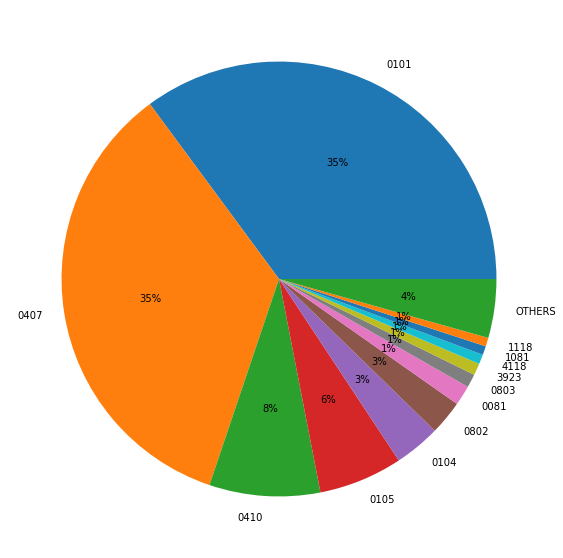

In [ ]:
analysis(df1,'Land_Use_Code',12)

In [ ]:
#df1=df1.copy()
#df1.Zip_Code=df1.Zip_Code.astype(str)
#df1=df1.copy()
#df1['Zip_Code']=(df1['Zip_Code'].str.split('.')).str.get(0)
#df1=df1.copy()
#df1.HEX=df1.HEX.astype(str)
#df1=df1.copy()
#df1['HEX']=(df1['HEX'].str.split('.')).str.get(0)

   HEX  Count  Percentage
0    0  87523       59.87
1    1  58663       40.13
      HEX  Count  Percentage
0       0  87523   59.870986
1  OTHERS  58663   40.129014


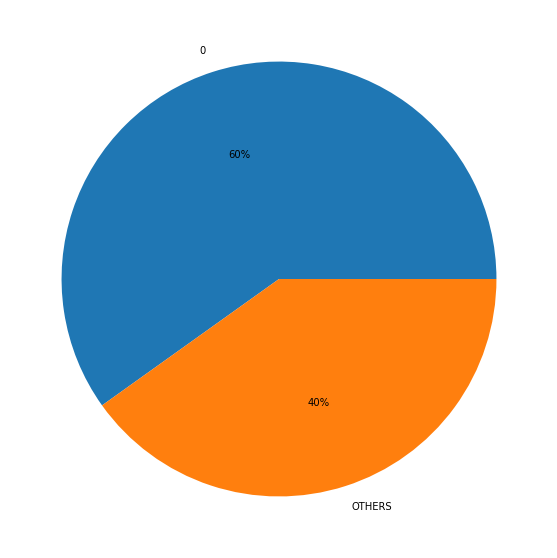

In [ ]:
analysis(df1,'HEX',1)

   Zip_Code  Count  Percentage
0     33033   5456        3.73
1     33032   5277        3.61
2     33139   4387        3.00
3     33160   3996        2.73
4     33157   3710        2.54
5     33186   3593        2.46
6     33179   3221        2.20
7     33178   3207        2.19
8     33147   3187        2.18
9     33141   3028        2.07
10    33015   3023        2.07
11    33169   2894        1.98
12    33142   2864        1.96
13    33161   2861        1.96
14    33196   2781        1.90
15    33131   2535        1.73
16    33056   2520        1.72
17    33177   2507        1.71
18    33180   2500        1.71
19    33133   2454        1.68
20    33126   2449        1.68
21    33176   2385        1.63
22    33162   2326        1.59
23    33054   2255        1.54
24    33193   2224        1.52
25    33035   2210        1.51
26    33138   2179        1.49
27    33030   2042        1.40
28    33134   2010        1.37
29    33012   1957        1.34
30    33150   1950        1.33
31    33

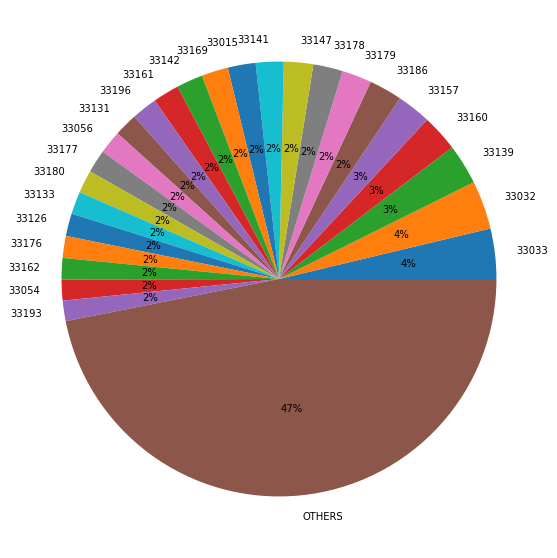

In [ ]:
analysis(df1,'Zip_Code',25)

In [ ]:
df1=df1.copy()
df1.SalesCode2=df1.SalesCode2.astype(str)
df1=df1.copy()
df1['SalesCode2']=(df1['SalesCode2'].str.split('.')).str.get(0)

   SalesCode2  Count  Percentage
0           1  57449       39.30
1          12  45541       31.15
2          37   9212        6.30
3          11   7572        5.18
4          18   7462        5.10
5           5   6878        4.70
6           3   3057        2.09
7          30   2701        1.85
8           2   1985        1.36
9          38   1811        1.24
10         19   1280        0.88
11         98    398        0.27
12         17    313        0.21
13         40    227        0.16
14         32    122        0.08
15         39     83        0.06
16         14     58        0.04
17         31     13        0.01
18         35     11        0.01
19         36      6        0.00
20         20      3        0.00
21         34      2        0.00
22         33      1        0.00
23          6      1        0.00
  SalesCode2  Count  Percentage
0          1  57449   39.298565
1         12  45541   31.152778
2         37   9212    6.301561
3         11   7572    5.179703
4         18   

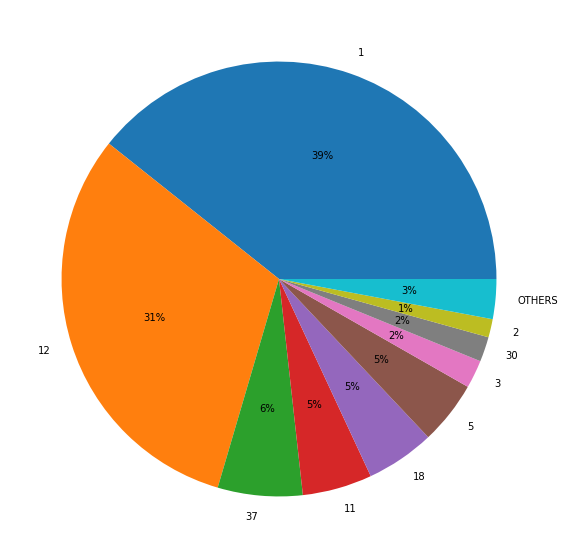

In [ ]:
analysis(df1,'SalesCode2',9)

In [ ]:
df3=df1[df1.Flipped==1]

   Land_Use_Code  Count  Percentage
0           0101  22321       42.12
1           0407  17303       32.65
2           0410   3830        7.23
3           0105   3086        5.82
4           0802   1594        3.01
5           0104   1538        2.90
6           0081    558        1.05
7           0803    453        0.85
8           1118    344        0.65
9           4118    279        0.53
10          1081    226        0.43
11          3923    199        0.38
12          1818    179        0.34
13          0066    147        0.28
14          9981     83        0.16
15          1111     73        0.14
16          0303     70        0.13
17          5001     65        0.12
18          4837     52        0.10
19          4081     37        0.07
20          1918     37        0.07
21          4818     35        0.07
22          0102     32        0.06
23          1066     31        0.06
24          4132     27        0.05
25          0508     25        0.05
26          1713     24     

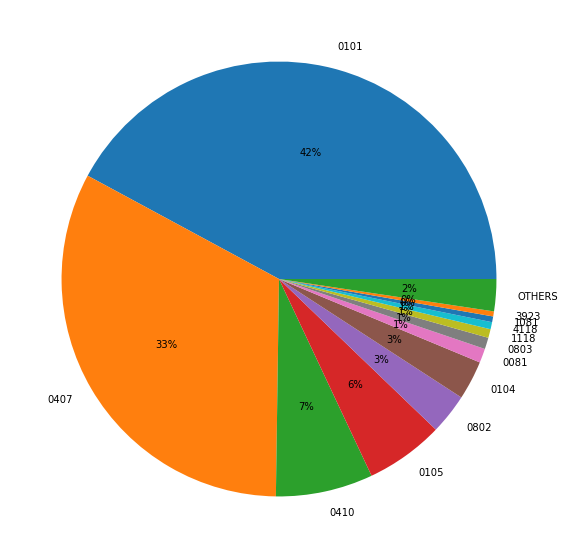

   HEX  Count  Percentage
0    0  30486       57.53
1    1  22508       42.47
      HEX  Count  Percentage
0       0  30486   57.527267
1  OTHERS  22508   42.472733


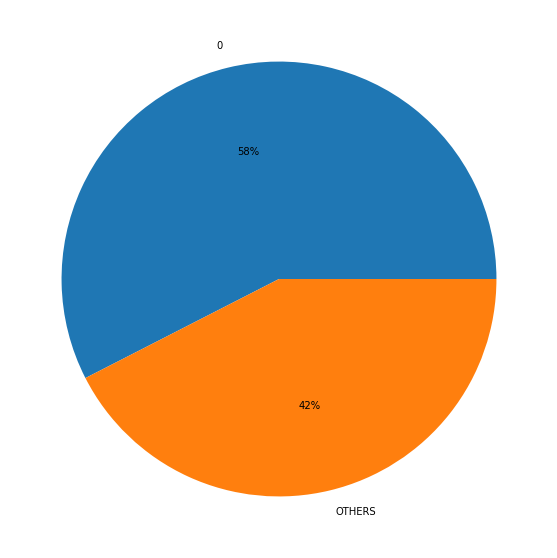

   Zip_Code  Count  Percentage
0     33033   1780        3.36
1     33147   1690        3.19
2     33157   1626        3.07
3     33186   1432        2.70
4     33169   1410        2.66
5     33142   1406        2.65
6     33056   1395        2.63
7     33015   1376        2.60
8     33032   1321        2.49
9     33179   1254        2.37
10    33161   1167        2.20
11    33177   1163        2.19
12    33054   1101        2.08
13    33055   1089        2.05
14    33160   1059        2.00
15    33126   1047        1.98
16    33139   1033        1.95
17    33176   1027        1.94
18    33162    998        1.88
19    33193    996        1.88
20    33196    951        1.79
21    33012    921        1.74
22    33178    890        1.68
23    33150    885        1.67
24    33035    845        1.59
25    33141    824        1.55
26    33127    821        1.55
27    33189    779        1.47
28    33183    762        1.44
29    33155    750        1.42
30    33175    739        1.39
31    33

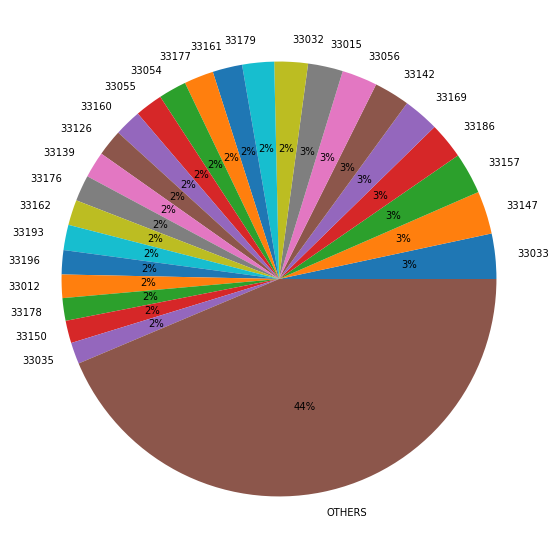

   SalesCode2  Count  Percentage
0          12  26699       50.38
1           1   8604       16.24
2          18   5029        9.49
3          37   4730        8.93
4           3   2381        4.49
5          11   2251        4.25
6          38    971        1.83
7          19    564        1.06
8          30    515        0.97
9           5    469        0.89
10          2    324        0.61
11         98    182        0.34
12         17    140        0.26
13         40     88        0.17
14         39     25        0.05
15         14     12        0.02
16         32      4        0.01
17         34      2        0.00
18         20      1        0.00
19          6      1        0.00
20         35      1        0.00
21         31      1        0.00
  SalesCode2  Count  Percentage
0         12  26699   50.381175
1          1   8604   16.235800
2         18   5029    9.489754
3         37   4730    8.925539
4          3   2381    4.492961
5         11   2251    4.247651
6         38    9

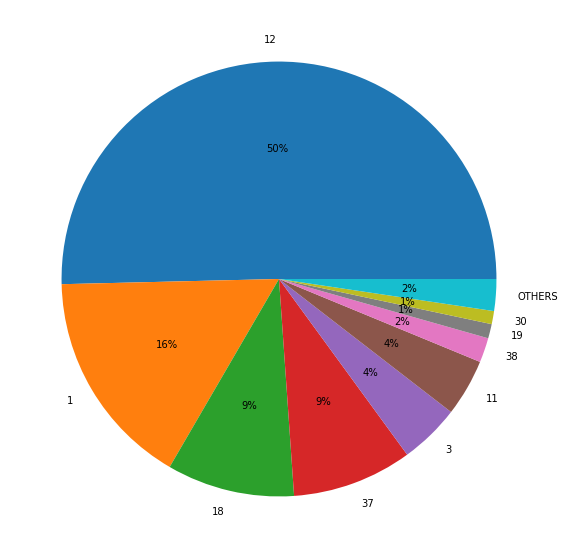

In [ ]:
analysis(df3,'Land_Use_Code',12)
analysis(df3,'HEX',1)
analysis(df3,'Zip_Code',25)
analysis(df3,'SalesCode2',9)

In [ ]:
df1[df1.SalesCode==98]

,Folio,SaleID,QU_FLG,SalesCode,SalesCode2,Zip_Code,Land_Use_Code,HEX,No_Owner1,YearBuilt,YearSale,DateSale,PurchaseDate,Days,Price,PurchasePrice,GrossMargin,Wholesale,Flipped
8,0101010901140,12.0,U,98.0,98,33132,2914,0,False,1958.0,2020,2020-07-29,2020-07-14,15,24016300.0,18849200.0,5167100.0,0,1
26,0101030501090,1.0,U,98.0,98,33136,1081,0,False,0.0,2019,2019-07-03,2019-07-03,0,79200.0,105600.0,26400.0,1,1
27,0101030501090,2.0,U,98.0,98,33136,1081,0,False,0.0,2019,2019-07-03,2019-07-03,0,105600.0,79200.0,-26400.0,1,0
28,0101030501090,4.0,U,98.0,98,33136,1081,0,False,0.0,2019,2019-07-03,2019-07-03,0,79200.0,105600.0,26400.0,1,1
29,0101030501090,5.0,U,98.0,98,33136,1081,0,False,0.0,2019,2019-07-03,2019-07-03,0,105600.0,52900.0,-52700.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144909,3660160110580,6.0,U,98.0,12,33190,0410,1,False,2004.0,2016,2016-11-18,2016-09-22,57,74000.0,199900.0,-125900.0,0,0
145223,3660160161430,5.0,U,98.0,1,33190,0410,1,False,2007.0,2019,2019-08-05,2016-12-23,955,255000.0,220000.0,35000.0,0,0
145357,3660160190040,5.0,U,98.0,1,33190,0407,0,False,2006.0,2014,2014-04-24,2014-04-11,13,175000.0,156000.0,19000.0,1,1
145540,3660160221220,2.0,U,98.0,5,33190,0407,0,False,2007.0,2014,2014-09-24,2013-06-28,453,216000.0,750000.0,-534000.0,0,0


In [ ]:
df1[df1.YearBuilt!=0.0].YearBuilt.min()

1902.0

In [ ]:
df1['NotBuildYet']=df1.YearBuilt==0.0

In [ ]:
df1.YearBuilt.value_counts()

0.0       5107
2006.0    4912
1972.0    4353
2005.0    4314
2007.0    3733
1971.0    3137
2004.0    3075
1950.0    2801
1974.0    2717
2015.0    2605
2008.0    2565
1973.0    2533
2016.0    2468
2014.0    2246
1956.0    2243
1989.0    2177
1954.0    2169
1970.0    2145
1987.0    2127
1969.0    2123
1968.0    2098
1986.0    2085
1957.0    2067
1953.0    2034
1955.0    2024
2003.0    2000
2017.0    1981
1981.0    1973
1988.0    1966
1958.0    1937
2018.0    1933
1984.0    1879
1980.0    1871
1952.0    1848
1976.0    1773
1949.0    1771
1959.0    1759
1990.0    1756
1960.0    1646
1979.0    1638
2013.0    1495
1985.0    1456
1947.0    1418
1982.0    1415
1951.0    1413
1965.0    1395
1948.0    1374
2002.0    1370
1991.0    1362
2001.0    1347
1966.0    1325
1967.0    1312
2019.0    1284
1998.0    1277
1983.0    1247
1975.0    1239
1961.0    1204
2020.0    1185
1977.0    1173
1997.0    1165
1994.0    1150
1962.0    1135
1964.0    1103
1940.0    1089
1995.0    1060
1993.0    1034
1996.0    

In [ ]:
df1.Wholesale.value_counts()

0    140368
1      5818
Name: Wholesale, dtype: int64

In [ ]:
df1.Flipped.value_counts()

0    93192
1    52994
Name: Flipped, dtype: int64

In [ ]:
df1.to_csv('organized_dataset_for_modeling.csv', index=False)

In [ ]:
df1.to_json('organized_dataset_for_modeling.json')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

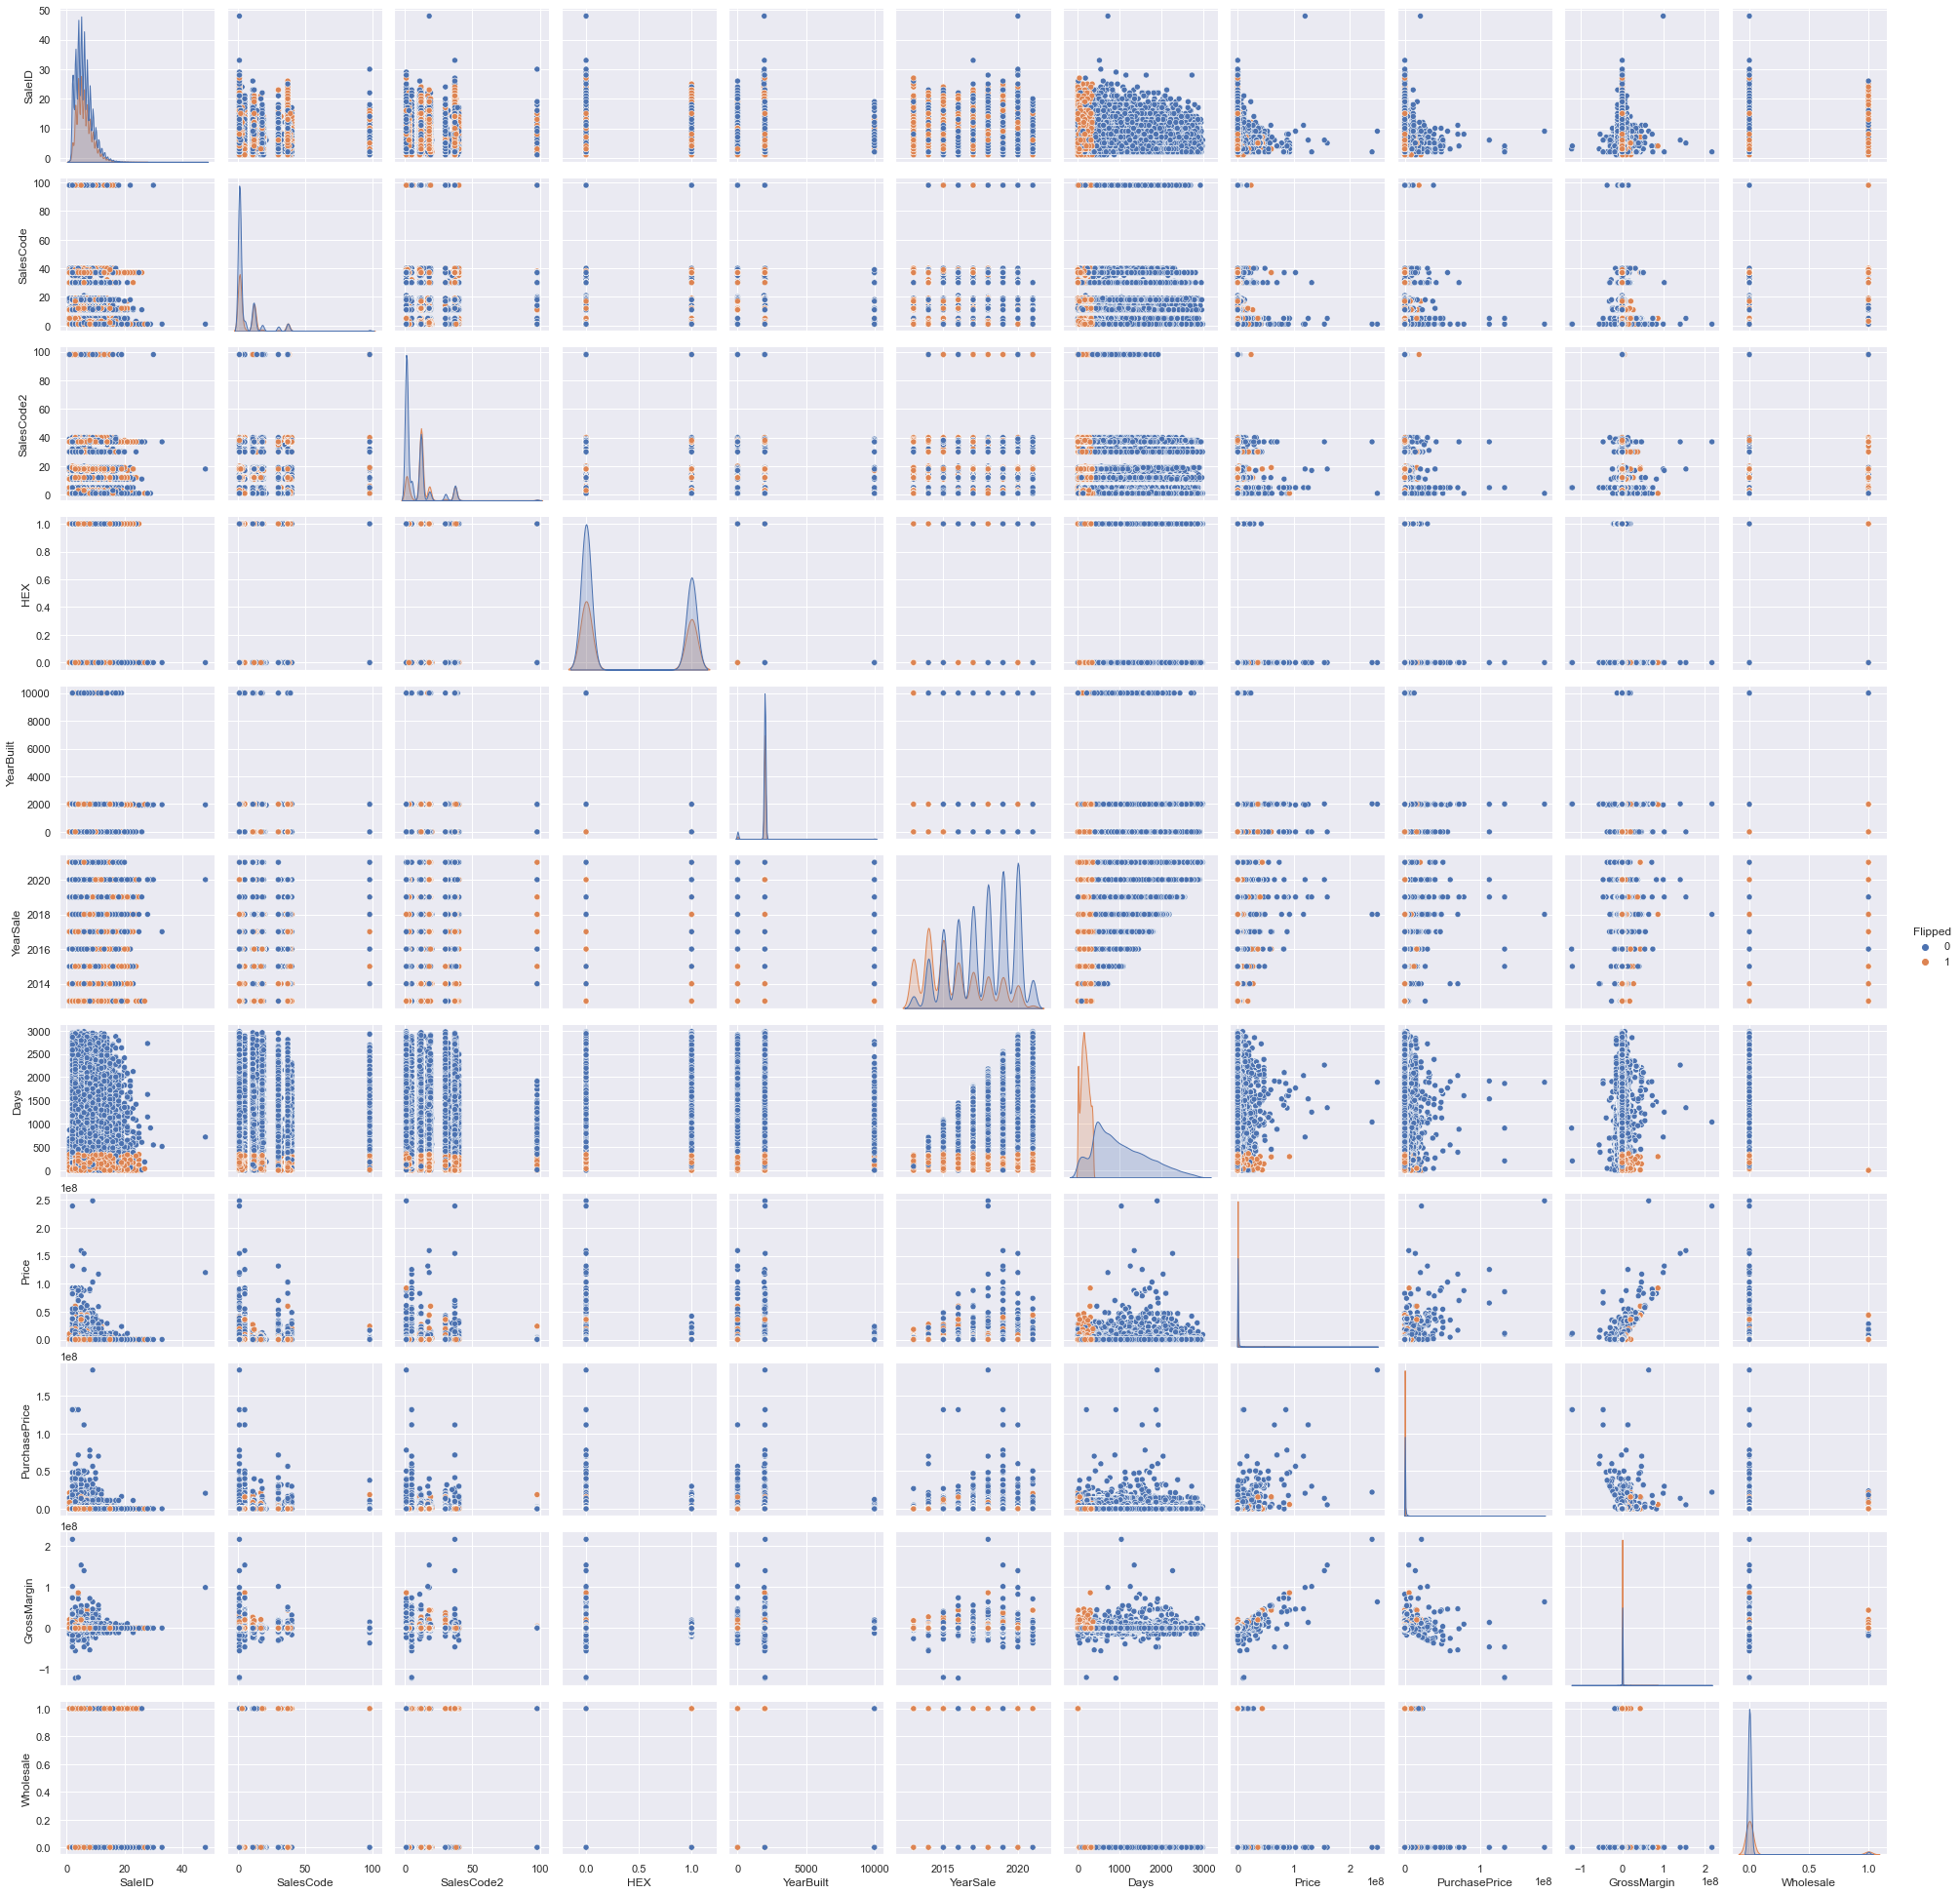

In [ ]:
sns.pairplot(data=df1,hue='Flipped')

In [ ]:
from statsmodels.stats.stattools import medcouple
import math

In [ ]:
def med(df,column):
        MC=medcouple(np.random.choice(df[column].to_numpy(),size=9999))
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        q_inf=q1-1.5*math.exp(-4*MC)*(q3-q1)
        q_sup=q3+1.5*math.exp(3*MC)*(q3-q1)
        print(f'Analized Column: {column}')
        print(f'  Quantile 25 o Quartile 1: {q1}')
        print(f'  Quantile 75 o Quartile 3: {q3}')
        print(f'Medcouple:\n  Limit inferior: {round(q_inf,2)}')
        print(f'  Limit superior: {round(q_sup,2)}')
def tukey(df,column):
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        q_inf=q1-1.5*(q3-q1)
        q_sup=q3+1.5*(q3-q1)
        print(f'Analized Column: {column}')
        print(f'  Quantile 25 o Quartile 1: {q1}')
        print(f'  Quantile 75 o Quartile 3: {q3}')
        print(f'Tukeys Test:\n  Limit inferior: {round(q_inf,2)}')
        print(f'  Limit superior: {round(q_sup,2)}')

In [ ]:
med(df1,'Price')
tukey(df1,'Price')

Analized Column: Price
  Quantile 25 o Quartile 1: 142000.0
  Quantile 75 o Quartile 3: 380000.0
Medcouple:
  Limit inferior: 18169.68
  Limit superior: 1169858.19
Analized Column: Price
  Quantile 25 o Quartile 1: 142000.0
  Quantile 75 o Quartile 3: 380000.0
Tukeys Test:
  Limit inferior: -215000.0
  Limit superior: 737000.0


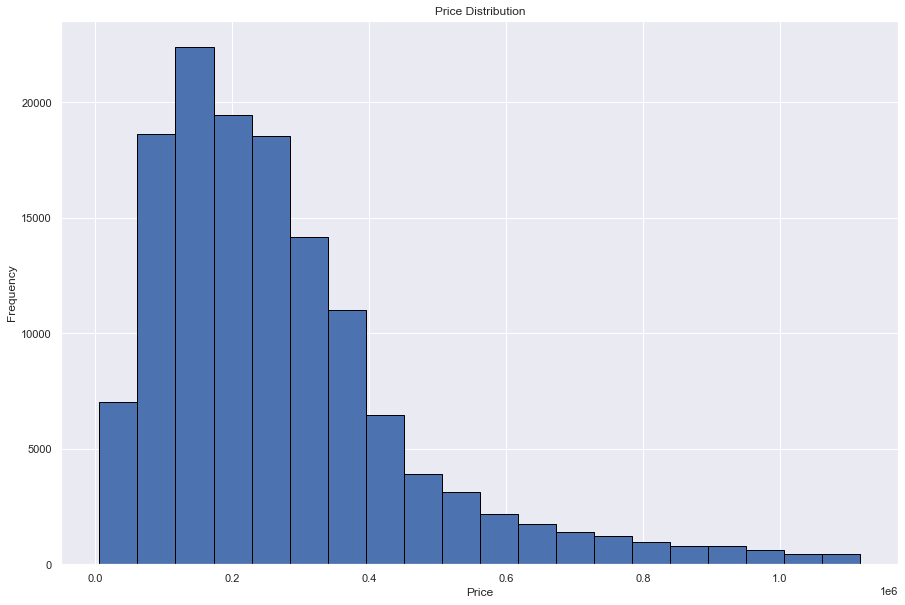

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df1.Price,range=(6390,1117822),edgecolor='black', bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(b='white')
plt.show()

In [ ]:
med(df1,'GrossMargin')
tukey(df1,'GrossMargin')

Analized Column: GrossMargin
  Quantile 25 o Quartile 1: 12100.0
  Quantile 75 o Quartile 3: 109700.0
Medcouple:
  Limit inferior: -58308.67
  Limit superior: 363199.59
Analized Column: GrossMargin
  Quantile 25 o Quartile 1: 12100.0
  Quantile 75 o Quartile 3: 109700.0
Tukeys Test:
  Limit inferior: -134300.0
  Limit superior: 256100.0


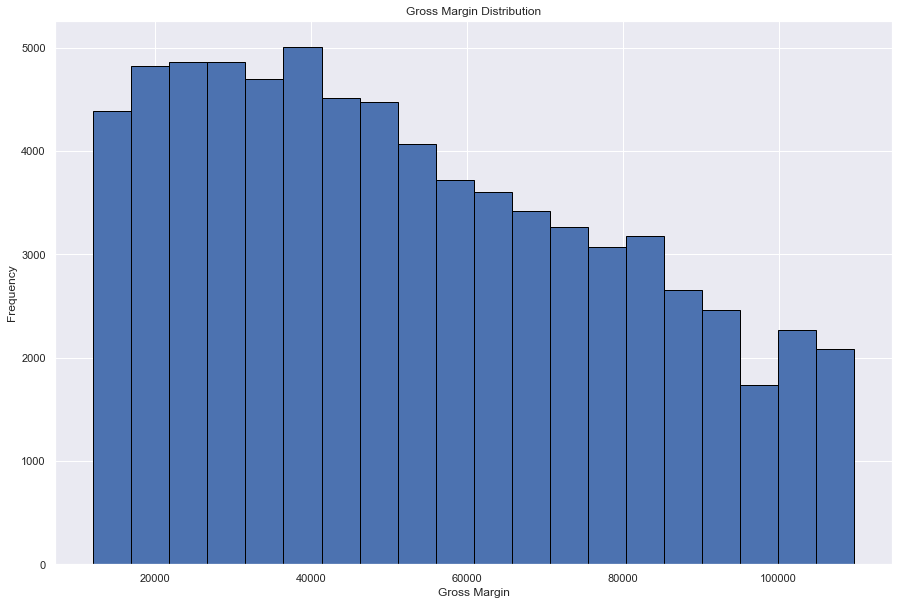

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df1.GrossMargin,range=(12100,109700),edgecolor='black', bins=20)
plt.xlabel('Gross Margin')
plt.ylabel('Frequency')
plt.title('Gross Margin Distribution')
plt.grid(b='white')
plt.show()

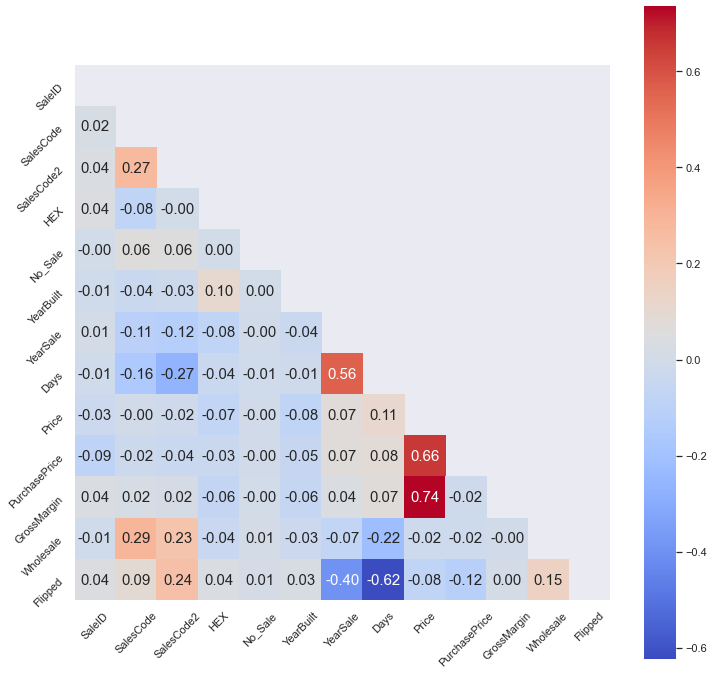

In [ ]:
corr=df1.corr()
plt.figure(figsize=(12,12))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cbar=True,square=True,annot=True,mask=mask,fmt='.2f',annot_kws={'size':15},
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# update 

In [ ]:
# Installing PyCaret in Local Jupyter Notebook
!pip install pycaret --user

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\user\\AppData\\Roaming\\Python\\Python38\\site-packages\\~umpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2


In [ ]:
print(pd.__version__)
print(np.__version__)

1.2.4
1.20.2


In [ ]:
df2.drop(columns=['GrossMargin','Days'],inplace=True)
df2.head()

,Folio,SaleID,QU_FLG,SalesCode,SalesCode2,Zip_Code,Land_Use_Code,HEX,No_Sale,YearBuilt,YearSale,DateSale,PurchaseDate,Price,PurchasePrice,Wholesale,Flipped
0,1079290092190,7.0,Q,1.0,18.0,33035,0410,1,False,2005.0,2018,2018-10-11,2018-06-06,130000.0,118000.0,0,1
1,3040110202012,5.0,Q,1.0,37.0,33155,0802,0,False,1979.0,2019,2019-07-30,2014-10-21,515000.0,240150.0,0,0
2,3021070040080,4.0,Q,3.0,12.0,33055,0802,0,False,1958.0,2016,2016-02-09,2015-12-09,172000.0,100100.0,0,1
3,0132310692810,3.0,Q,1.0,1.0,33132,0407,0,False,2008.0,2020,2020-07-31,2013-12-04,2300000.0,2900000.0,0,0
4,3020020170020,7.0,Q,1.0,12.0,33015,0410,0,False,1974.0,2015,2015-08-25,2015-04-23,196000.0,119700.0,0,1


In [ ]:
# colab
!pip install pycaret
# If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.

from pycaret.utils import enable_colab
enable_colab()

In [ ]:
# shuffle
df3=df2.sample(frac=1).reset_index(drop=True)

In [ ]:
df3.head()

,Folio,SaleID,QU_FLG,SalesCode,SalesCode2,Zip_Code,Land_Use_Code,HEX,No_Sale,YearBuilt,YearSale,DateSale,PurchaseDate,Days,Price,PurchasePrice,GrossMargin,Wholesale,Flipped
0,1079290092190,7.0,Q,1.0,18.0,33035,0410,1,False,2005.0,2018,2018-10-11,2018-06-06,127,130000.0,118000.0,12000.0,0,1
1,3040110202012,5.0,Q,1.0,37.0,33155,0802,0,False,1979.0,2019,2019-07-30,2014-10-21,1743,515000.0,240150.0,274850.0,0,0
2,3021070040080,4.0,Q,3.0,12.0,33055,0802,0,False,1958.0,2016,2016-02-09,2015-12-09,62,172000.0,100100.0,71900.0,0,1
3,0132310692810,3.0,Q,1.0,1.0,33132,0407,0,False,2008.0,2020,2020-07-31,2013-12-04,2431,2300000.0,2900000.0,-600000.0,0,0
4,3020020170020,7.0,Q,1.0,12.0,33015,0410,0,False,1974.0,2015,2015-08-25,2015-04-23,124,196000.0,119700.0,76300.0,0,1


In [ ]:
data = df3.sample(frac=0.95, random_state=786)
data_unseen = df3.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (138877, 17)
Unseen Data For Predictions: (7309, 17)


In [ ]:
from pycaret.classification import *

In [ ]:
exp_clf101 = setup(data = data, target = 'Flipped', session_id=123)

,Description,Value
0,session_id,123
1,Target,Flipped
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(138877, 17)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8435,0.9150,0.7741,0.7896,0.7818,0.6599,0.6600,18.1580
lightgbm,Light Gradient Boosting Machine,0.8357,0.9070,0.7642,0.7781,0.7711,0.6430,0.6430,0.7920
rf,Random Forest Classifier,0.8163,0.8897,0.7142,0.7633,0.7379,0.5968,0.5976,13.9960
gbc,Gradient Boosting Classifier,0.8087,0.8751,0.7269,0.7401,0.7334,0.5843,0.5844,18.2810
et,Extra Trees Classifier,0.7887,0.8652,0.6401,0.7410,0.6868,0.5286,0.5319,21.8490
ada,Ada Boost Classifier,0.7775,0.8458,0.6489,0.7113,0.6786,0.5090,0.5103,4.0540
dt,Decision Tree Classifier,0.7752,0.7576,0.6940,0.6878,0.6909,0.5142,0.5143,1.8560
lda,Linear Discriminant Analysis,0.7472,0.8100,0.5510,0.6884,0.6120,0.4279,0.4338,4.0880
ridge,Ridge Classifier,0.7465,0.0000,0.5421,0.6911,0.6076,0.4244,0.4312,0.3110
knn,K Neighbors Classifier,0.6891,0.7312,0.5620,0.5719,0.5669,0.3245,0.3245,4.3450


In [ ]:
print(best_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


In [ ]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8450,0.9162,0.7753,0.7922,0.7836,0.6629,0.6630
1,0.8455,0.9162,0.7801,0.7904,0.7852,0.6646,0.6646
2,0.8423,0.9143,0.7756,0.7861,0.7808,0.6577,0.6577
3,0.8420,0.9157,0.7767,0.7847,0.7807,0.6572,0.6572
4,0.8461,0.9172,0.7776,0.7933,0.7854,0.6654,0.6655
5,0.8479,0.9172,0.7826,0.7941,0.7883,0.6696,0.6696
6,0.8432,0.9139,0.7715,0.7904,0.7808,0.6588,0.6590
7,0.8402,0.9130,0.7607,0.7901,0.7752,0.6513,0.6516
8,0.8432,0.9152,0.7704,0.7911,0.7806,0.6587,0.6588
9,0.8400,0.9108,0.7704,0.7840,0.7771,0.6524,0.6525


In [ ]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8017,0.8796,0.8256,0.6886,0.7509,0.5884,0.5951
1,0.7994,0.8808,0.8244,0.6854,0.7485,0.5840,0.5909
2,0.7960,0.8776,0.8270,0.6793,0.7459,0.5783,0.5861
3,0.7919,0.8797,0.8267,0.6731,0.7421,0.5707,0.5792
4,0.7996,0.8809,0.8330,0.6831,0.7506,0.5859,0.5939
5,0.8032,0.8810,0.8264,0.6907,0.7525,0.5913,0.5979
6,0.7916,0.8768,0.8164,0.6755,0.7393,0.5683,0.5754
7,0.7926,0.8758,0.8045,0.6807,0.7374,0.5680,0.5734
8,0.8009,0.8806,0.8292,0.6863,0.7510,0.5876,0.5949
9,0.7963,0.8777,0.8167,0.6828,0.7438,0.5770,0.5834


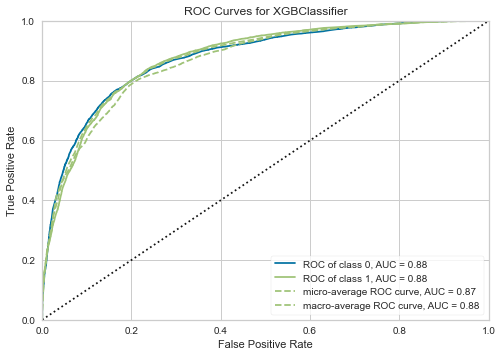

In [ ]:
plot_model(tuned_xgboost, plot = 'auc')

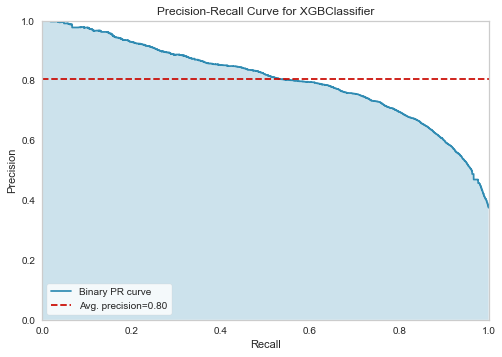

In [ ]:
plot_model(tuned_xgboost, plot = 'pr')

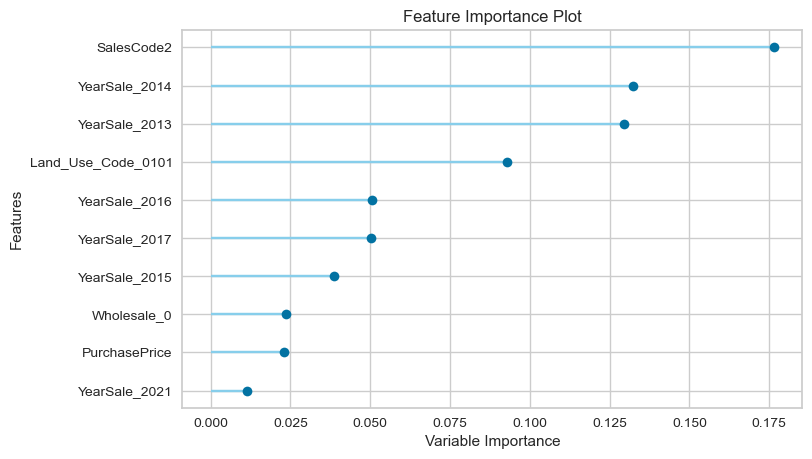

In [ ]:
plot_model(tuned_xgboost, plot='feature')

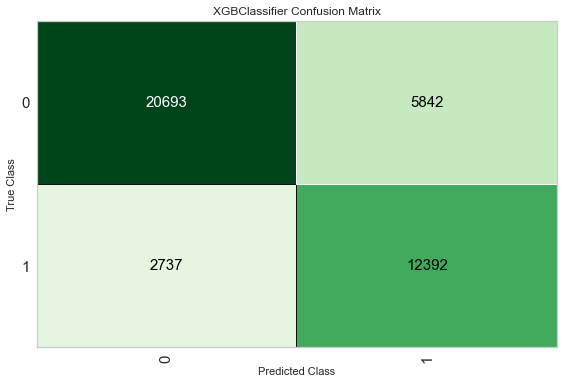

In [ ]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7941,0.8765,0.8191,0.6796,0.7429,0.5736,0.5806


In [ ]:
final_xgboost = finalize_model(tuned_xgboost)

In [ ]:
#Final xgboost model parameters for deployment
print(final_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0005, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0.05,
              reg_lambda=5, scale_pos_weight=2.1, subsample=0.5,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


In [ ]:
predict_model(final_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8004,0.8834,0.8275,0.6869,0.7507,0.5866,0.5937


In [ ]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,Folio,SaleID,QU_FLG,SalesCode,SalesCode2,Zip_Code,Land_Use_Code,HEX,No_Sale,YearBuilt,YearSale,DateSale,PurchaseDate,Price,PurchasePrice,Wholesale,Flipped,Label,Score
0,3031040051710,3.0,Q,1.0,11.0,33147,0081,0,False,0.0,2018,2018-11-15,2017-10-18,90000.0,73100.0,0,0,0,0.5201
1,0131270280980,8.0,U,12.0,12.0,33142,0803,0,False,1926.0,2016,2016-12-13,2016-10-27,107000.0,102700.0,0,1,1,0.5328
2,3530290030040,6.0,Q,1.0,1.0,33172,0101,0,False,1988.0,2018,2018-01-22,2013-08-12,405000.0,340000.0,0,0,0,0.5434
3,3049270530360,6.0,U,12.0,18.0,33183,0407,1,False,1994.0,2018,2018-07-16,2017-12-29,152300.0,129100.0,0,1,1,0.5441
4,3049210202040,6.0,Q,1.0,12.0,33185,0105,1,False,1989.0,2015,2015-11-06,2015-05-06,300000.0,210100.0,0,1,1,0.5410


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Flipped'], unseen_predictions['Label'], metric = 'Accuracy')

0.8022

In [ ]:
save_model(final_xgboost,'Final XGB Model 23Apr2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Flipped',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                interaction_constraints='', learning_rate=0.0005,
                                max_delta_step=0, max_depth=10,
                                min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_es

In [ ]:
# saved_final_rf = load_model('Final RF Model 11Nov2020')

In [ ]:
# new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [ ]:
start = time.time()
lud = pd.read_csv(os.path.join(os.getcwd(),'landausedescription.csv'),low_memory=False,dtype={'Property\nUse': str, 'DSCR': str})
end = time.time()
print(f'Execution time: {round((end - start)/60,2)} min')

Execution time: 0.0 min


In [ ]:
lud

,Property\nUse,DSCR
0,0000,REFERENCE FOLIO
1,0001,VACANT RESIDENTIAL : RESIDENTIAL - SINGLE FAMILY
2,0004,VACANT RESIDENTIAL : RESIDENTIAL - TOTAL VALUE
3,0005,VACANT RESIDENTIAL : CLUSTER HOME
4,0007,VACANT RESIDENTIAL: CONDO
...,...,...
641,9981,ACREAGE NOT CLASSIFIED AG : VACANT LAND
642,9984,ACREAGE NOT CLASSIFIED AG : RECREATIONAL OR EN...
643,9985,ACREAGE NOT CLASSIFIED AG : SO FLORIDA WATER M...
644,9989,ACREAGE NOT CLASSIFIED AG : BACK ASSESSMENT


In [ ]:
lud.rename(columns={'Property\nUse':'LandUseCode'},inplace=True)

In [ ]:
lud.shape

(646, 2)

In [ ]:
# VANCANT
vacant=lud[lud['DSCR'].str.contains('VACANT.*')==True]
vacant.shape

(92, 2)

In [ ]:
novacant=lud[lud['DSCR'].str.contains('VACANT.*')==False]
novacant.shape

(552, 2)

In [ ]:
# COMMERCIAL
commercial=novacant[novacant['DSCR'].str.contains('COMMERCIAL.*')==True]
commercial.shape

(61, 2)

In [ ]:
nocommercial=novacant[novacant['DSCR'].str.contains('COMMERCIAL.*')==False]
nocommercial.shape

(491, 2)

In [ ]:
residential=nocommercial[nocommercial['DSCR'].str.contains('RESIDENTIAL.*')==True]
residential.shape

(75, 2)

In [ ]:
noresidential=nocommercial[nocommercial['DSCR'].str.contains('RESIDENTIAL.*')==False]
noresidential.shape

(416, 2)

In [ ]:
# CONDOS
condos=residential[residential.DSCR.str.contains('CONDOMINIUM.*')==True] 
condos.shape

(7, 2)

In [ ]:
# RESIDENTIAL
res=residential[residential.DSCR.str.contains('CONDOMINIUM.*')==False] 
res.shape

(68, 2)

In [ ]:
vacant.to_csv('G1_vacant_table.csv',index=False)
res.to_csv('G2_residential_table.csv',index=False)
condos.to_csv('G3_condos_table.csv', index=False)
commercial.to_csv('G4_commercial_table.csv',index=False)
noresidential.to_csv('G5_others_table.csv',index=False)

In [ ]:
vacant.shape[0]+res.shape[0]+condos.shape[0]+commercial.shape[0]+noresidential.shape[0]

644

In [ ]:
commercial=commercial.copy()
commercial['split']=(commercial['DSCR'].str.split())

In [ ]:
commercial['One']=commercial.split.str.get(0)
commercial['Sec']=commercial.split.str.get(1)
commercial['Thr']=commercial.split.str.get(2)
commercial['Fou']=commercial.split.str.get(3)
commercial['Fif']=commercial.split.str.get(4)
commercial['Six']=commercial.split.str.get(5)

In [ ]:
commercial[commercial['One'].str.contains('COMMERCIAL.*')==True]

,LandUseCode,DSCR,split,One,Sec,Thr,Fou,Fif,Six
